In [3]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
import astropy.coordinates as coord
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy import stats
from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':16})
from astropy.io import fits
import ebf
import pdb
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import (CartesianRepresentation,CartesianDifferential)
from astropy.coordinates import Galactic
from astropy import units as u1
from astropy.coordinates import SkyCoord
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from itertools import groupby
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import poisson

/Users/Jenny/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Jenny/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Jenny/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Running a galaxia simulation for halo17 with mag ranging from 14-20 mag, r < 1000 kpc, fsample 0.1, popID10.

In [12]:
data=ebf.read('halo12'+'.ebf') #reads in ebf file for galaxia output
df=pd.DataFrame() #creates empty pandas DataFrame
   
keys=data.keys() #creates list of keys for the ebf file
    

In [13]:
data

{'log': array([b'# File generated by 0.7.1\n# <parameterfile>\noutputFile                          halo12\noutputDir                           ./\nphotoSys                            UBV\nmagcolorNames                       V,B-V\nappMagLimits[0]                     14\nappMagLimits[1]                     26\nabsMagLimits[0]                     -1000\nabsMagLimits[1]                     1000\ncolorLimits[0]                      -1000\ncolorLimits[1]                      1000\ngeometryOption                      0\nstarType                            0\nphotoError                          0\nsurveyArea                          1000\nfSample                             0.01\npopID                               10\nwarpFlareOn                         1\nlongitude                           0\nlatitude                            90\nseed                                17\nr_max                               1000\n# codeDataDir                         /home/jding/galaxia/GalaxiaData/\n# rSun

In [14]:
it = np.arange(1.5,3,0.1)
num = []

In [15]:
for item in it:
    kk=  data['grav'][(data['pz']>4) & (data['rad']>20) & (data['rad']<100)]
    #kk = jj['grav'][jj['rad']>20]
    
    num.append(len(kk[kk<item]))

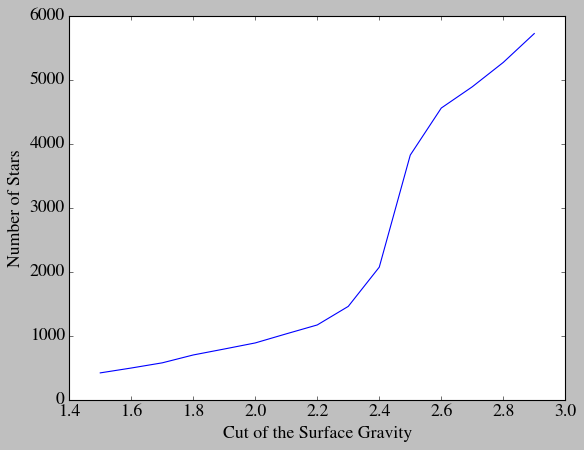

In [16]:
#plotting distance versus vrad (compared to Bullock 2005)

plt.plot(it,num,c='b')
plt.ylabel('Number of Stars')
plt.xlabel('Cut of the Surface Gravity')

plt.show()
plt.show()

In [11]:
print (len(data['grav']),len(data['grav'][data['grav']<2.2]))

14828361 71519


In [15]:
satidflag = np.loadtxt('halo17_bound.txt')

In [4]:
flag2 = np.loadtxt('halo17_bound_circ.txt')

In [ ]:
data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf')


In [36]:
data2

{'nsat': array([  0,   0, 113,   0,   0, 102,   0, 104, 159,  97, 168,   0, 102,
          0, 211, 155,   0, 155,   0,   0, 149], dtype=int32),
 'nsatc': array([   0,    0,    0,    0,    0,  113,    0,  215,  416,  319,  575,
           0,  743,    0,  845, 1056,    0, 1211,    0,    0, 1366],
       dtype=int32),
 'tsat': array([ 0.313,  0.313,  0.313, ..., 12.9  , 13.   , 13.   ], dtype=float32),
 'jsat': array([0.507, 0.329, 0.571, ..., 0.021, 0.167, 0.518], dtype=float32),
 'lsat': array([4.5682450e+05, 4.6837606e+05, 2.2339744e+08, ..., 3.8119658e+03,
        1.0873786e+04, 2.6693228e+03], dtype=float32),
 'msat': array([1.64e+09, 5.48e+08, 6.97e+10, ..., 2.23e+08, 1.12e+09, 2.01e+08],
       dtype=float32),
 'bsat': array([1, 1, 1, ..., 0, 0, 0], dtype=int32),
 'esat': array([0.444, 0.601, 0.576, ..., 0.679, 0.424, 0.684], dtype=float32),
 'log': array([b'Properties of each satellite are stored in a linear list\nProperty lists are as follows\n    Tsat = time since accretion (Gyr

In [44]:
idt = range(np.min(data['satid']),np.max(data['satid'])+1,1)

In [46]:
np.max(idt)

1365

In [ ]:
data2['msat'][1211:(1515-149)] < 0.4e11

In [49]:
idlowmass = np.unique(data['satid'])[data2['msat'][1211:(1515-149)] < 0.4e11]

In [50]:
idlowmass

array([1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221,
       1222, 1224, 1226, 1227, 1229, 1230, 1231, 1232, 1233, 1234, 1235,
       1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246,
       1247, 1248, 1249, 1250, 1251, 1252, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1268, 1269, 1270, 1271,
       1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282,
       1283, 1284, 1285, 1286, 1287, 1289, 1290, 1291, 1292, 1293, 1294,
       1295, 1296, 1297, 1298, 1300, 1301, 1302, 1303, 1304, 1305, 1306,
       1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317,
       1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328,
       1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350,
       1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361,
       1362, 1363, 1364, 1365], dtype=int32)

In [38]:
np.max(data['satid'])

1365

In [59]:
def make_csv(data_name, deg,num,particle): #string, float (rotation angle in degrees)
    import ebf
    import pandas as pd
    import numpy as np

    
    rot=deg*np.pi/180. #angle in radians
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf')
   
    
    data=ebf.read(data_name+'.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
   
    keys=data.keys() #creates list of keys for the ebf file
    
    if particle == True:
        cut = (data['partid']==0)
    else:
        cut = ()
    
    idlowmass = np.unique(data['satid'])[data2['msat'][1211:(1515-149)] < 0.4e11]
    flagi = np.unique(data['satid'])[np.where(satidflag == 0)]
    flag = flagi[np.isin(flagi,idlowmass)]
    
    #for ii in range(1,len(list(data.keys()))): #for each list in the ebf file, create a dataframe column with that key as a column name
       # s=pd.Series(data[name])
        #print (s)
        
        #df[list(data.keys())[ii]]=data[list(data.keys())[ii]]
        #print (s)
    
    index = range(0,len(data['smass'][cut][np.isin(data['satid'][cut],flag)]),1)
    indexi = np.random.choice(index, num, replace=False)
    
    
    df['smass']=data['smass'][cut][np.isin(data['satid'][cut],flag)][indexi]
    
    df['age']=data['age'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['rad']= data['rad'][cut][np.isin(data['satid'][cut],flag)][indexi]
    
    df['mag0']= data['mag0'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['mag1']= data['mag1'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['mag2']= data['mag2'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['popid']= data['popid'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['satid']= data['satid'][cut][np.isin(data['satid'][cut],flag)][indexi]
    #df['fieldid']=data['fieldid']
    #df['partid']=data['partid']
    #df['center']=data['center']
    df['lum']= data['lum'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['teff']= data['teff'][cut][np.isin(data['satid'][cut],flag)][indexi]
       
    #set original output positions and velocities as xx_0. These are in the unrotated frame where x-axis does not always point to galactic center
    df['glon_0']= data['glon'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['glat_0']= data['glat'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['px_0']= data['px'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['py_0']= data['py'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['pz_0']= data['pz'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['vx_0']= data['vx'][cut][np.isin(data['satid'][cut],flag)][indexi]
    df['vy_0']= data['vy'][cut][np.isin(data['satid'][cut],flag)][indexi]  
    df['vz_0']= data['vz'][cut][np.isin(data['satid'][cut],flag)][indexi]
    
    
    
    
    
    #print (df['glon_0'],df['glon'])

    #set outputs by rotating so x-axis points to galactic center
    df['glon']=(df['glon_0']-deg)%360
    df['glat']=df['glat_0']
    df['px']=df['px_0']*np.cos(rot)+df['py_0']*np.sin(rot)
    df['py']=-df['px_0']*np.sin(rot)+df['py_0']*np.cos(rot)
    df['pz']=df['pz_0']
    df['vx']=df['vx_0']*np.cos(rot)+df['vy_0']*np.sin(rot)
    df['vy']=-df['vx_0']*np.sin(rot)+df['vy_0']*np.cos(rot)
    df['vz']=df['vz_0']
    
    
    
    #set original center values
    o_cen=np.full(len(df['glon']), np.nan)
 
    o_cen[0:6]=[-8.0, 0.0, 0.015, 11.1, 239.08, 7.25]
    df['orig_center']=o_cen

    df.to_csv(data_name+'bound.csv', index=False) #save as CSV with same base name that can be opened in python 3
    return df



In [60]:
testd = make_csv('halo17', 0,2000,False)

[1224 1227 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240
 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1255 1256
 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1268 1269 1270 1271
 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285
 1286 1287 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1300 1301
 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315
 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329
 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343
 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357
 1358 1359 1360 1361 1362 1363 1364 1365]


In [21]:
len(testd['px'])

2000

In [18]:
def get_coord_obj_rot(data): #pandas DataFrame
    import astropy
    import astropy.coordinates as coord
    import astropy.units as u
    import numpy as np
    x=data['px'].values#full sets in heliocentric coords
    y=data['py'].values
    z=data['pz'].values
    vx=data['vx'].values
    vy=data['vy'].values
    vz=data['vz'].values
    
    v_sun_gc=[data['orig_center'][3], data['orig_center'][4], data['orig_center'][5]] #galactocentric sun coordinates, based on original heliocentric x-axis aligned with galactocentric X-axis

    gal=coord.SkyCoord(u=x*u.kpc, v=y*u.kpc, w=z*u.kpc, #galactic frame cartesian coordinate object
                       U=vx*u.km/u.s, V=vy*u.km/u.s, W=vz*u.km/u.s, frame='galactic', 
                       representation_type='cartesian', differential_type='cartesian')
    gal.representation_type='spherical' #change type to spherical (l, b, proper motions, rad vel, etc)
    gal.differential_type=coord.representation.SphericalCosLatDifferential

    return gal #return coordinate object

#TURNS A DATAFRAME OF STARS INTO ASTROPY COORDINATE OBJECT, GALACTIC FRAME (HELIOCENTRIC X-AXIS TO GC), TAKING INTO ACCOUNT THE SOLAR REFLEX MOTION
def get_coord_obj_rot_gsr(data):
    import astropy
    import astropy.coordinates as coord
    import astropy.units as u
    import numpy as np
    x=data['px'].values#full sets in heliocentric coords
    y=data['py'].values
    z=data['pz'].values
    vx=data['vx'].values
    vy=data['vy'].values
    vz=data['vz'].values
    # v_sun_gl=[data['center'][3], data['center'][4], data['center'][5]]
    v_sun_gc=[11.1, 239.08, 7.25] #galactocentric sun coordinates
    v_sun=coord.CartesianDifferential(v_sun_gc*u.km/u.s) #turn into a coordinate cartesian differential
    
   
    gal=coord.SkyCoord(u=x*u.kpc, v=y*u.kpc, w=z*u.kpc,
                       U=(vx+v_sun_gc[0])*u.km/u.s, V=(vy+v_sun_gc[1])*u.km/u.s, W=(vz+v_sun_gc[0])*u.km/u.s, frame='galactic',
                       representation_type='cartesian', differential_type='cartesian') #adds solar velocity to star velocity for calculating gsr frame parameters
    
    gal.representation_type='spherical' #convert to spherical representation (l, b, distance)
    
    gal.differential_type=coord.representation.SphericalCosLatDifferential #convert differentials to spherical cos lat (proper motions, radial velocity)
    print (gal)
    return gal

#takes an angle and returns corresponding angle within limits. If no minparam give, returns angle between (0,2*pi)/(0,360)
#if minval is given returns angle between (minval, minval+2*pi)/(minval, minval+360). Ex if minval=-pi, range will be (-pi, pi)
def limrange(angle, *minparam, **degflag):    #float, float, bool (deg=True/False)
    import numpy as np
    if len(minparam) == 0: minval = 0.0
    else: minval = minparam[0]
    
    if ('deg' in degflag):
        newangle = (angle-minval)%(360.0)+minval
    else:   
        newangle = (angle-minval)%(2.0*np.pi)+minval
        
    return newangle

#add radial velocity, l, b, dist, proper motions, v_gsr, pm_gsr, v_t, v_t_gsr, dist modulus to CSV
def rv_csv(halo, field, deg): #string, string, int
    import pandas as pd
    import numpy as np
    #NAME OF CSV FILE
    if deg%1==0: #if deg is integer use make string
        d=str(int(deg))
    else:
        d="{0:.2f}".format(deg) #else round to 2 decimals and make string
    data_name=halo+'/'+d+'/'+field+'/'+halo+'_'+field+'_'+d
    #OPEN CSV
    data=pd.read_csv(data_name+'.csv')
    #GALACTOCENTRIC SOLAR VELOCITY WITH SUN ON X-AXIS
    v_sun_gc=[11.1, 239.08, 7.25]
    #CREATE ASTROPY COORD OBJECT
    gal=get_coord_obj_rot(data)
    gal_gsr=get_coord_obj_rot_gsr(data)
    #ASSIGN TO DATAFRAME
    data=data.assign(l_coord=gal.l.degree)
    data=data.assign(b_coord=gal.b.degree)
    data=data.assign(pm_l_cosb=gal.pm_l_cosb)
    data=data.assign(pm_b=gal.pm_b)
    data=data.assign(pm_mag=np.sqrt(np.add(np.square(data.pm_b),np.square(data.pm_l_cosb))))
    data=data.assign(r_v=gal.radial_velocity)
    data=data.assign(dist=gal.distance)
    data=data.assign(dm=5.*np.log10(gal.distance.value*1000.)-5.)
    data=data.assign(v_l=4.74047*gal.pm_l_cosb*gal.distance)
    data=data.assign(v_b=4.74047*gal.pm_b*gal.distance)
    data=data.assign(v_t=np.sqrt(np.add(np.square(data.v_l),np.square(data.v_b))))
    data=data.assign(pm_l_cosb_gsr=gal_gsr.pm_l_cosb)
    data=data.assign(pm_b_gsr=gal_gsr.pm_b)
    data=data.assign(pm_mag_gsr=np.sqrt(np.add(np.square(data.pm_b_gsr),np.square(data.pm_l_cosb_gsr))))
    data=data.assign(v_gsr=gal_gsr.radial_velocity)
    data=data.assign(v_l_gsr=4.74047*gal_gsr.pm_l_cosb*gal_gsr.distance)
    data=data.assign(v_b_gsr=4.74047*gal_gsr.pm_b*gal_gsr.distance)
    data=data.assign(v_t_gsr=np.sqrt(np.add(np.square(data.v_l_gsr),np.square(data.v_b_gsr))))
    #SAVE NEW CSV WITH SAME NAME TO REPLACE
    data.to_csv(data_name+'.csv', index=False)
    



In [12]:
rad_t = get_coord_obj_rot_gsr(testd)

RuntimeError: no relevant input found; should not happen!

In [9]:
gctest = get_coord_obj_rot(testd)

In [28]:
gc1 = rad_t.transform_to(coord.Galactocentric)

In [25]:
gc2 = gctest.transform_to(coord.Galactocentric)

NameError: name 'coord' is not defined

In [ ]:
gc2.galactic

In [29]:
rad_t.radial_velocity

<Quantity [ 24.68798297, 227.4217406 ,  -4.18732053, ...,  85.96278539,
            98.44770831,  15.66443134] km / s>

In [30]:
r2= np.sqrt(gc1.x**2+gc1.y**2+gc1.z**2)

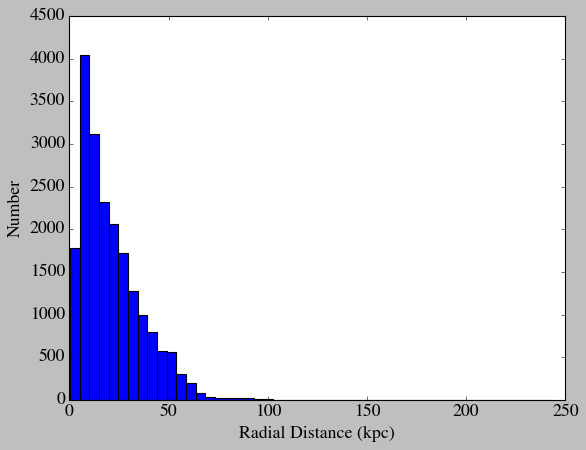

In [31]:
plt.hist(testd['rad'],bins=50)
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Number')
plt.show()

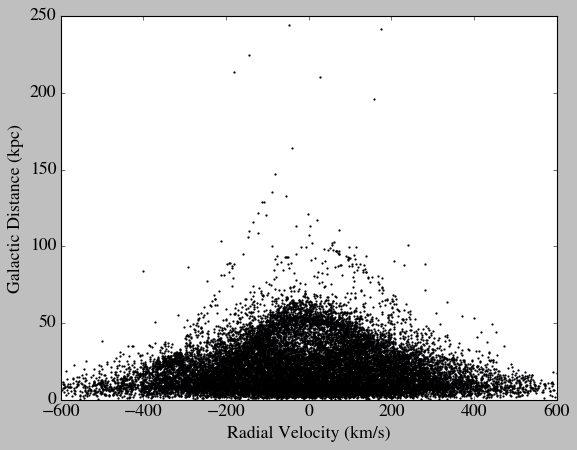

In [32]:
#plotting distance versus vrad (compared to Bullock 2005)

plt.scatter(rad_t.radial_velocity/u1.km*u1.s,testd['rad'],s=1,c='b')
plt.ylabel('Galactic Distance (kpc)')
plt.xlabel('Radial Velocity (km/s)')
plt.xlim(-600,600)
plt.ylim(0,250)
plt.show()
plt.show()

In [33]:
len(gc1.x)

20000

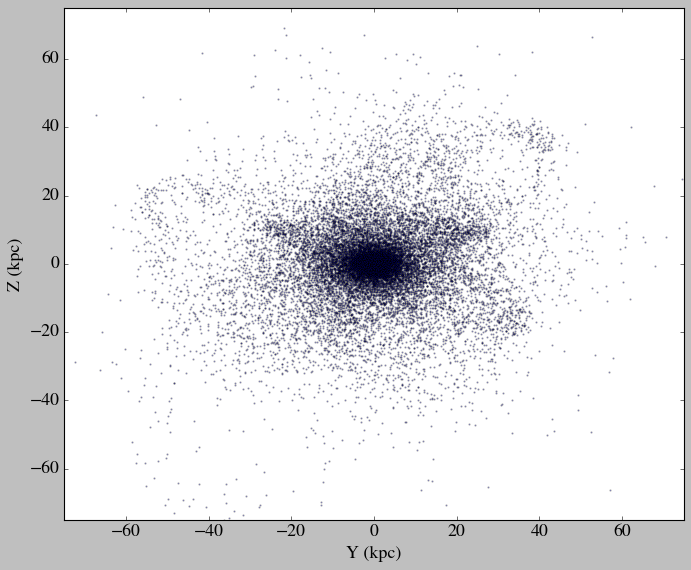

In [34]:
#plotting the x, y position for the selected 30000 sample
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.scatter(gc1.y,gc1.z,s=1,alpha=0.3)
ax.set_xlabel('Y (kpc)')
ax.set_ylabel('Z (kpc)')
#ax.set_zlabel('Z (kpc)')
ax.set_ylim(-75,75)
ax.set_xlim(-75,75)
#ax.set_zlim(-75,75)
#plt.savefig('3d.png')
plt.show()

# Velocity dispersion

In [3]:
# Function for calculating the space separation and the velocity difference in each shell

def v_diff(spaces,data,interval):
    
    '''
        :param spaces: Scale for space sparation   
        :param data: The orginal dataset
        :param interval: raidal space interval for the shell of calculating the space separation
   
        
    '''
    
    vdiffh = []
    rlim = []
    num = []
    spect = []
    kk=0
    for ii in range(int(20),int(80),interval):
        
        rlim.append(ii)
        zmin = ii
        zmax = ii+interval
        dfx=pd.DataFrame()
        dfxf = pd.DataFrame()
        dfx['x']=data['x'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['y']=data['y'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['z']=data['z'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['Vgal']= data['Vgal'][ (zmin < data['r'] ) & (data['r'] < zmax ) ]
        dfx['SimbadName']= data['SimbadName'][ (zmin < data['r'] ) & (data['r'] < zmax )]
       
        dfx['r']= data['r'][ (zmin < data['r'] ) & (data['r'] < zmax )]
        dia=[]
        vdiff = []
        spacedt = []
        num.append(len(dfx['r']))
        dfx2 = dfx.sort_values(by=['SimbadName'])
        
        indexp = [x for x in data.index if x not in dfx2.index]
        indexs = np.append(np.array(dfx2.index),np.array(indexp))
        
        dfxf = data.loc[indexs]
        
        
        #print (dfx2['r'])
        k = Comp(dfx2['x'],dfx2['y'],dfx2['z'],dfx2['Vgal'])
        k2 = Comp(dfxf['x'],dfxf['y'],dfxf['z'],dfxf['Vgal'])
        
        print (k.rv,k2.rv)
        #vsort = k.rv[np.argsort(dfx['r'])]
        #xsort = k.x[np.argsort(dfx['r'])]
        #ysort = k.y[np.argsort(dfx['r'])]
        #zsort = k.z[np.argsort(dfx['r'])]
       # print ('v1',k.rv,k.x)
        #print ('v2',k2.rv,k2.x)
        
        
            
        #calculating the velocity difference and space separation for each shell
        for jj in range(0,len(k.rv)): 
            
            #print (k.rv,k2.rv)
           
            
            vi = np.repeat(k.rv[jj],len(k2.rv))
            xi = np.repeat(k.x[jj],len(k2.rv))
            yi = np.repeat(k.y[jj],len(k2.rv))
            zi = np.repeat(k.z[jj],len(k2.rv))
            print (len(vi))
        
            diffv = (vi - k2.rv)**2
            diffx = (xi - k2.x)**2
            diffy = (yi - k2.y)**2
            diffz = (zi - k2.z)**2
        
        
            diff = diffv+diffx+diffy+diffz
            spaced = diffx+diffy+diffz
          
            
            dia.append(diff)
            vdiff.append(vi - k2.rv)
            spacedt.append(np.sqrt(spaced))
        #print (len(vdiff))
        
        
        
        
        #diaf = np.array(dia)[np.triu_indices(len(dfx['r']),1)]
        vdiffto = np.array(vdiff)[np.triu_indices(len(k.rv),1)]
        specdto = np.array(spacedt)[np.triu_indices(len(k.rv),1)]
         
        spect.append(specdto)
        
        print (len(vdiffto),len(specdto))
        
        vdiffh.append(vdiffto[specdto < spaces[kk]])
       
        kk=kk+1
        
    return rlim,vdiffh,num,spect
        
        

In [29]:
zmin = 20
zmax = 100
zlim = 4.

In [30]:
ra = r2/u1.kpc

NameError: name 'r2' is not defined

In [31]:
r2= ra

NameError: name 'ra' is not defined

In [32]:
vral = rad_t.radial_velocity/u1.km*u1.s

NameError: name 'rad_t' is not defined

In [33]:
groupidi = range(0,len(testd))

NameError: name 'testd' is not defined

In [34]:
# cutting r and z > 20 & r < 60 kpc stars 
df1=pd.DataFrame()
df2=pd.DataFrame()
df3 = pd.DataFrame()
df1['x']=gc1.x[ (zmin < r2 ) & (r2 < zmax ) ]
df1['y']=gc1.y[ (zmin < r2 ) & (r2< zmax ) ]
df1['z']=gc1.z[ (zmin < r2 ) & (r2 < zmax ) ]
df1['Vgal']= vral[ (zmin <r2 ) & (r2 < zmax ) ]
df1['r']= r2[ (zmin < r2) & (r2 < zmax )]
df1['starid']= np.array(groupidi)[ (zmin < r2) & (r2 < zmax )]
df1['index']= np.arange(0,len(df1['r']),1)
#print (df1['index'])
df2['r']=df1['r'][(np.absolute(df1['z']) > zlim)]
df2['x']=df1['x'][(np.absolute(df1['z']) > zlim)]
df2['y']=df1['y'][(np.absolute(df1['z']) > zlim) ]
df2['z']=df1['z'][(np.absolute(df1['z']) > zlim)]
df2['Vgal']= df1['Vgal'][(np.absolute(df1['z']) > zlim)]
df2['starid']= df1['starid'][(np.absolute(df1['z']) > zlim)]
df2['index']= np.arange(0,len(df2['r']),1)

NameError: name 'gc1' is not defined

In [3]:
df3 = pd.read_csv('df3_halo17_grav2.2.csv')

In [4]:
df3=df3[:100] #grav cut= 2.1

In [5]:
#class for the input of the correlation function 
class Comp:
    def __init__(self,x,y,z,rv,groupid):
        '''
        class for the input of the correlation function 
        :param x: x position for the target 
        :param y: y position for the target 
        :param z: z position for the target
        :param rv: radial velocity for the target 
        
        '''

        self.x = np.array(x)
        self.y = np.array(y)
        self.z = np.array(z)
        self.rv = np.array(rv)
        self.groupid = np.array(groupid)



In [8]:
def v_diff(spaces, data, interval):
    '''
        :param spaces: Scale for space sparation
        :param data: The orginal dataset
        :param interval: raidal space interval for the shell of calculating the space separation


    '''

    vdiffh = []
    rlim = []
    num = []
    spect = []
    indexout = []
    n = 0
    zmini = [20, 26, 32, 38, 44, 60, 76]
    zmaxi = [26, 32, 38, 44, 60, 76, 92]
    for ii in range(0,7,1):

        rlim.append(zmini[ii])
        zmin = zmini[ii]
        zmax = zmaxi[ii]
        dfx = pd.DataFrame()
        dfxf = pd.DataFrame()
        dfx['x'] = data['x'][(zmin < data['r']) & (data['r'] < zmax)]
        # print (dfx['x'])
        dfx['y'] = data['y'][(zmin < data['r']) & (data['r'] < zmax)]
        dfx['z'] = data['z'][(zmin < data['r']) & (data['r'] < zmax)]
        dfx['Vgal'] = data['Vgal'][(zmin < data['r']) & (data['r'] < zmax)]
        dfx['index'] = data['index'][(zmin < data['r']) & (data['r'] < zmax)]

        dfx['r'] = data['r'][(zmin < data['r']) & (data['r'] < zmax)]
        indexf = []
        vdiff = []
        spacedt = []
        num.append(len(dfx['r']))
        dfx2 = dfx.sort_values(by=['index'])

        indexp = [x for x in data.index if x not in dfx2.index]
        indexs = np.append(np.array(dfx2.index), np.array(indexp))

        dfxf = data.loc[indexs]

        # print (dfx2,dfxf)

        # print (dfx2['r'])
        k = Comp(dfx2['x'], dfx2['y'], dfx2['z'], dfx2['Vgal'], dfx2['index'])
        k2 = Comp(dfxf['x'], dfxf['y'], dfxf['z'], dfxf['Vgal'], dfxf['index'])
        zmin=zmax
        # print (k.rv,k2.rv)
        # vsort = k.rv[np.argsort(dfx['r'])]
        # xsort = k.x[np.argsort(dfx['r'])]
        # ysort = k.y[np.argsort(dfx['r'])]
        # zsort = k.z[np.argsort(dfx['r'])]
        # print ('v1',k.rv,k.x)
        # print ('v2',k2.rv,k2.x)



        # calculating the velocity difference and space separation for each shell
        for jj in range(0, len(k.rv)):

            # print (k.rv,k2.rv)


            vi = np.repeat(k.rv[jj], len(k2.rv))
            
            xi = np.repeat(k.x[jj], len(k2.rv))
            yi = np.repeat(k.y[jj], len(k2.rv))
            zi = np.repeat(k.z[jj], len(k2.rv))

            diffv = (vi - k2.rv) ** 2
            diffx = (xi - k2.x) ** 2
            diffy = (yi - k2.y) ** 2
            diffz = (zi - k2.z) ** 2
            indext = []
            for kk in range(0, len(k2.groupid)):
                indext.append(str(k.groupid[jj]) + '-' + str(k2.groupid[kk]))

            # diff = diffv+diffx+diffy+diffz
            spaced = diffx + diffy + diffz

            indexf.append(indext)
            # dia.append(diff)
            vdiff.append(vi - k2.rv)
            print (vdiff)
            spacedt.append(np.sqrt(spaced))
        # print (len(vdiff))




        # diaf = np.array(dia)[np.triu_indices(len(dfx['r']),1)]
        vdiffto = np.array(vdiff)[np.triu_indices(len(k.rv), 1)]
        specdto = np.array(spacedt)[np.triu_indices(len(k.rv), 1)]
        indexfo = np.array(indexf)[np.triu_indices(len(k.rv), 1)]
        spect.append(specdto)
        indexout.append(indexfo[specdto < spaces])

        # print (len(vdiffto),len(specdto))

        vdiffh.append(vdiffto[specdto < spaces])

        n = n + 1

    return rlim, vdiffh, num, spect, indexout



rlimf = []
test1f = []
numf = []
sepf = []
indexf = []

for scale in [0.5,2]:
    rlim, test1, num, sep, indexii = v_diff(scale, df3, 10)
    rlimf.append(rlim)
    test1f.append(test1)
    numf.append(num)
    sepf.append(sep)
    indexf.append(indexii)



    
    

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

       -6.75152845e+02, -6.43446360e+02, -6.50403474e+02, -6.44426147e+02])]
[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043,

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

[array([   0.        ,  -11.21292694,   -2.00617903,  -28.14475304,
        -27.10531208,  -10.79553327,  -10.94618133,   -8.14854263,
        -14.40553684,   -8.16373945,   -1.83492415,  -13.48852197,
        -22.62027122,  -22.21004656,  -14.75236564,   -2.11194658,
        -31.833525  ,   -5.56008449,    5.38092529,   -6.68094191,
        -23.17161222,   -7.21723136,  -23.73821536,  -11.88888203,
         -1.2169372 ,  -12.21477911,  -31.90021928,   -9.01976768,
         -5.19940613,  -16.16393425,   -4.48391833,  -19.63206252,
        -17.70980201,  -22.49560529,   -9.41464652,   -9.00807148,
         -4.37470017,  -20.30138718,   -0.88704391,  -35.09716449,
        -18.45329446,   -9.25845197,   -6.82089706,  -11.53580918,
         -5.94733304,  -36.19979088, -638.09039216, -659.51325827,
       -662.58436262, -639.68813236, -634.35759767, -649.37806258,
       -656.27803795, -650.57427221, -654.11467043, -677.42553882,
       -652.13024342, -648.27418237, -654.60523916, -648.0985

IndexError: too many indices for array

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=False, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
    
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(sep[k], bins=50, label='Number of the stars in the shell is '+str(num[k]))
            
        ax[index][jndex].axvline(6,linewidth = 3,c= 'r')
        ax[index][jndex].set_xlabel('Space Separation kpc')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend(loc=1, prop={'size': 15})
        
            
            
        k = k + 1
plt.savefig('halo09_space_bound.png')            
plt.show()

NameError: name 'sep' is not defined

In [1]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
sc = 2
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(test1f[sc][k], bins=100, label=str(int(rlimf[sc][k])) +'-'+ str(int(rlimf[sc][k]+8))+'kpc')
            
        ax[index][jndex].set_xlim(-1500,1500)
        ax[index][jndex].set_xlabel('Velocity Difference km/s')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend( prop={'size': 20})
        
            
            
        k = k + 1
plt.savefig('halo17_space_2_unbound.png')             
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#shell scale = 10 kpc range 2-12 kpc 
s6h = []
s6b = []
for ii in range(0,5):
    hist, bin_edges = np.histogram(test1f[2][ii], density=False,bins=100)
    s6h.append(hist)
    s6b.append(bin_edges)

In [101]:
len(test1f[1])

7

In [116]:
dff = pd.DataFrame()
for sc in range(0,len(test1f)):
    for k in range(0,len(test1f[1])):
        hist, bin_edges = np.histogram(test1f[sc][k], density=False,bins=100)
       
        
    
        dff[str(int(rlimf[sc][k])) +'-'+ str(int(rlimf[sc][k]+8))+'kpc y'] = hist
        dff[str(int(rlimf[sc][k])) +'-'+ str(int(rlimf[sc][k]+8))+'kpc x'] = bin_edges[:100]


In [118]:
dff.to_csv("test.csv")

In [96]:
np.savetxt('halo17_scale2_vel_01.txt', test1f, delimiter=' ')

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e %.18e %.18e %.18e %.18e %.18e %.18e')

In [48]:
#Plotting the histogram for the space separation for each shell (number of the stars in the shell labelled)

fig, ax = plt.subplots(3, 2, figsize=(18, 20), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=False, sharey=False)

fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
k = 0
    
degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
for index in range(ax.shape[0]):
    for jndex in range(ax.shape[1]):
        ax[index][jndex].hist(sep[k], bins=50, label='Number of the stars in the shell is '+str(num[k]))
            
        ax[index][jndex].axvline(6,linewidth = 3,c= 'r')
        ax[index][jndex].set_xlabel('Space Separation kpc')
        ax[index][jndex].set_ylabel('Number of Pairs')
        ax[index][jndex].legend(loc=1, prop={'size': 15})
        
            
            
        k = k + 1
plt.savefig('halo17_space_bound.png')            
#plt.show()

In [90]:
#shell scale = 10 kpc range 2-12 kpc 
s6h = []
s6b = []
for ii in range(0,5):
    hist, bin_edges = np.histogram(test1f[2][ii], density=False,bins=100)
    s6h.append(hist)
    s6b.append(bin_edges)

In [133]:
data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
df=pd.DataFrame() #creates empty pandas DataFrame
   
keys2=data2.keys() #creates list of keys for the ebf file

In [324]:
staridf = df3['starid'][np.isin(df3['index'],np.ravel(uniqueid))]

satidunqiue = testd['satid'][np.isin(groupidi,staridf)]

satidunqiue = testd['satid'][np.isin(groupidi,staridf)]

In [95]:
poisson.std()

1.4142135623730951

In [371]:
satidcut = np.isin(np.arange(1211,(1515-149)),np.unique(satidunqiue))

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


#--------get data--------------------


#data=data.as_matrix()

def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def two_gaussians(x, h1, c1, w1, h2, c2, w2, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0)  + 
        offset)
def one_gaussian(x,h1,c1,w1,offset):
    return (gaussian(x, h1, c1, w1, offset))


    
def fitting_result(x,y,h1,c1, w1, h2, c2, w2,offset,bins):
    
   

    guess6= [h1,c1, w1, h2, c2, w2,offset]

    optim1, success1 = curve_fit(two_gaussians, x, y,p0=[guess6[:]])
    optim2, success2 = curve_fit(one_gaussian, x, y,p0=[h1,c1, w1,offset])
    
    chisq1 = np.sum(((y-two_gaussians(x, *optim1))**2)/(poisson.std(50,loc=0)**2))/(bins-len(guess6))
    
    #chisq1 = chisquare(y,two_gaussians(x, *optim1))[0]
    print (optim1,chisq1)
    #print ('err',np.sqrt(np.diag(success1)))
    plt.scatter(x,y, c='pink', label='measurement', marker='.', edgecolors=None)
    plt.plot(x, two_gaussians(x, *optim1), c='b', label='fit of 2 Gaussians')
    plt.title("Two gaussian fitting")
    plt.ylabel("Number of pairs")
    plt.xlabel("Velocity Difference")
    plt.legend(loc='upper left')
#plt.savefig('result.png')
    plt.show()
    
    #np.sum(np.absolute((two_gaussians(x, *optim1) - y)**2/two_gaussians(x, *optim1)))
    chisq2 = np.sum(((y-one_gaussian(x, *optim2))**2)/(poisson.std(1/2*np.max(y),loc=0)**2))/(bins-len(guess6))

    #print ('err',np.sqrt(np.diag(success2)))
    plt.scatter(x,y, c='pink', label='measurement', marker='.', edgecolors=None)
    plt.plot(x, one_gaussian(x, *optim2), c='b', label='fit of 1 Gaussians')
    plt.title("One gaussian fitting")
    plt.ylabel("Number of pairs")
    plt.xlabel("Velocity Difference")
    plt.legend(loc='upper left')
        #plt.savefig('gaussian_fit.png')
    plt.show()
    #np.sum(np.absolute((one_gaussian(x, *optim2) - y)**2/one_gaussian(x, *optim2)))
    
    
    
    if np.absolute(chisq1) < np.absolute(chisq2):
        
        interen = integrate.quad(lambda x: two_gaussians(x, *optim1), -np.absolute((optim1[2]*3))+optim1[1],np.absolute(optim1[2]*3)+optim1[1])[0]
        intereb = integrate.quad(lambda x: two_gaussians(x, *optim1), -np.absolute((optim1[5]*3))+optim1[4], -np.absolute((optim1[2]*3))+optim1[1])[0]
        ratio = interen/(2*intereb)
        
        print ('test',interen,intereb,-optim1[2]*3+optim1[1], optim1[2]*3+optim1[1],-optim1[5]*3+optim1[4], -optim1[2]*3+optim1[1],ratio)
    
        return optim1,chisq1,success1,ratio
    else:
        print (chisq2)
        return optim2, chisq2,success2,[]

In [92]:
def nstar_position(indexf,vel_diff,times,bins,s6b,s6h):
    indexstot = []
    narrowtotal = []
    overlaptot = []
    indexoutot = [ ]
    optim = []
    integrer = []
    f = open("halo17_file2.txt", "a")
    for ii in range(0,len(s6b)):
        
        print (ii)
        result,chisq,success1,ratio = fitting_result(s6b[ii][:bins],s6h[ii],np.max(s6h[ii]),20, 60, np.max(s6h[ii])/2 , 20, 120,0,bins)
        optim.append(np.append(result,chisq))
        if len(result) > 5:
            f.write('& ' + str(np.round(chisq,2)) + '& ' +str(np.round(result[2],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(success1))[2],2))+ '& '+str(np.round(result[5],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(success1))[5],2)) + '& '
               +str(np.round(result[0],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(success1))[0],2)) + '& '+str(np.round(result[3],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(success1))[3],2)) + '& '+str(np.round(result[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(success1))[1],2)) + '& '
               +str(np.round(result[4],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(success1))[4],2)) + '& '+str(np.round(ratio,2))+ "\\"+'\n')
        width = np.absolute(result[2])
        print (ratio)
        
        #result = integrate.quad(lambda x: , 0, 4.5)
        
        indexout = indexf[ii][(np.absolute(vel_diff[ii]) > times*width)]

        indexcut = indexf[ii][(vel_diff[ii] < times*width) & (vel_diff[ii] > -times*width)]

        indexoutt = []
        indexs = []
        for item in indexout:
            indexoutt.append(int(item[:item.find('-')]))
            indexoutt.append(int(item[item.find('-')+1:]))

        indexoutot.append(indexoutt)
        for item in indexcut:
            indexs.append(int(item[:item.find('-')]))
            indexs.append(int(item[item.find('-')+1:]))
        
        
            
        overlap = []

        for item1 in np.unique(indexoutt):
            for item2 in np.unique(indexs):
                if item1 == item2:
                    overlap.append(item2)
        totaln = []
        uniqueid =  []



        for ii in range(0,len(indexs)):
            n = 0 
            for item1 in overlap:
                if indexs[ii] == item1:
                    n=n+1
      
      

            if n ==0:
        
            
                uniqueid.append(indexs[ii])
            totaln.append(n)
        indexstot.append(np.ravel(indexs))
        overlaptot.append(np.ravel(indexs)[np.isin(np.ravel(indexs),overlap)])
        narrowtotal.append(np.ravel(uniqueid))
        
    f.close()  
    return indexoutot,indexstot,overlaptot,narrowtotal
        
        
        


            
        
        
    

0
[ 1.38937849e+05 -1.01761580e+01  3.42285268e+01  7.43791798e+03
 -1.88958827e+01  6.48375763e+02 -2.65583449e+03] 9835.611137901471


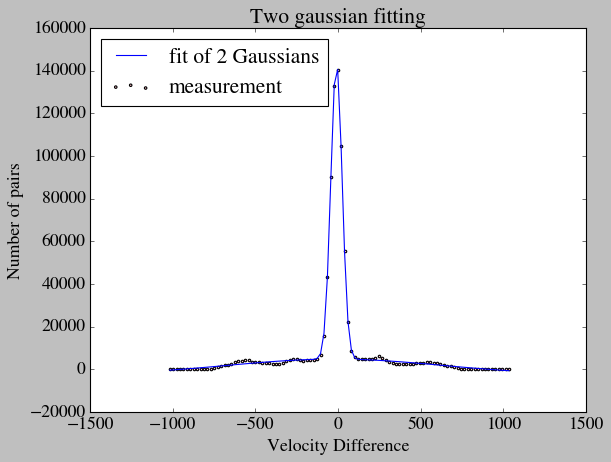

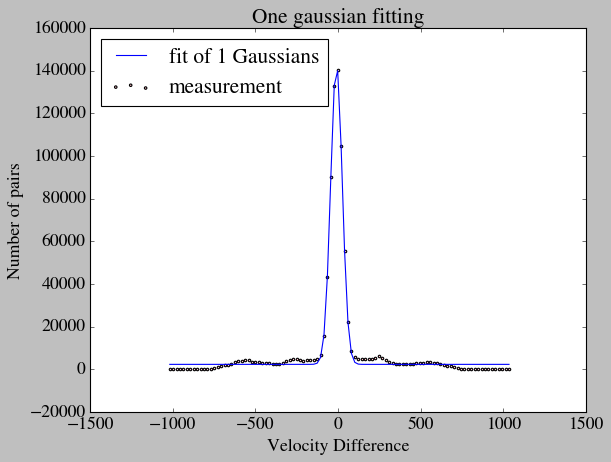

45.793833419256146
[]
1
[ 1.22554660e+05 -1.01059490e+01  2.52561509e+01  8.44385371e+06
 -1.41768965e+01  4.19704714e+04 -8.44223180e+06] 5980.818837344337


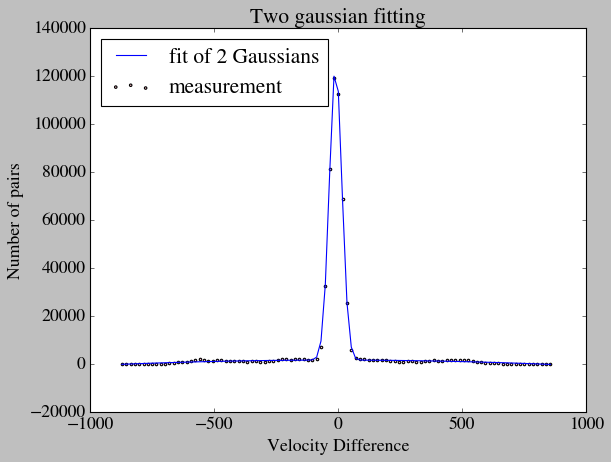

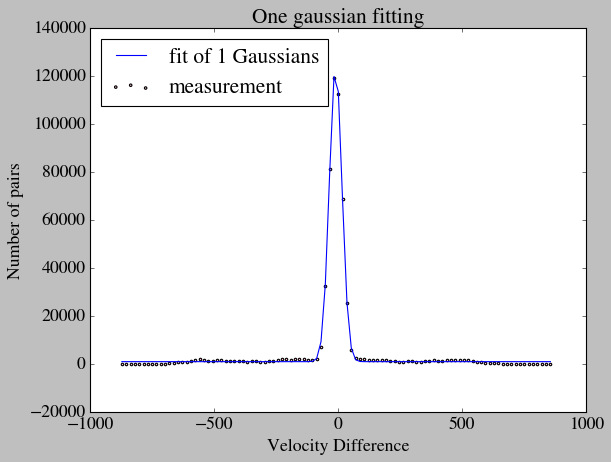

9.819970319813276
[]
2
[1980.22955405   -7.29053724   27.43661021  638.53342304  -13.46145101
  254.10742495   -6.64683532] 25.175682094463653


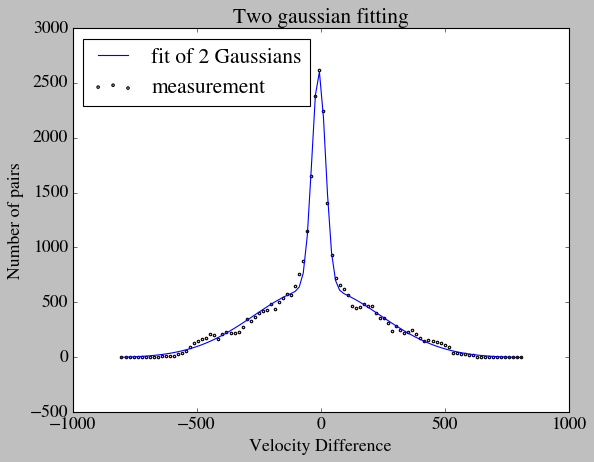

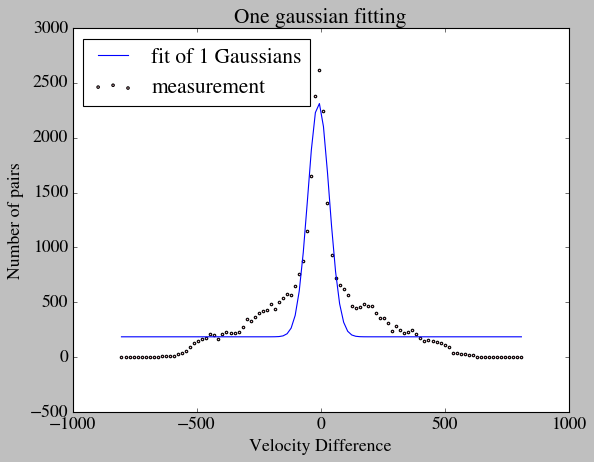

test 238001.37096497565 150532.2481458996 -89.60036788458862 75.01929340466233 -775.7837258487248 -89.60036788458862 0.7905328389645082
0.7905328389645082
3
[ 9.23335554e+02 -4.26428270e+00  2.32696718e+01  2.83478115e+02
 -2.91153222e+00  1.89037827e+02 -2.05822035e-02] 7.253505486872022


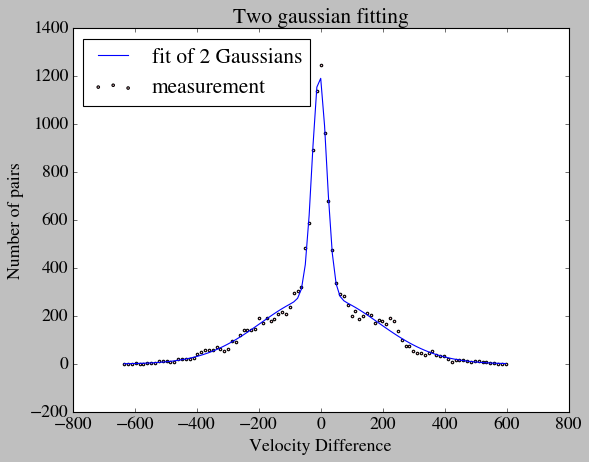

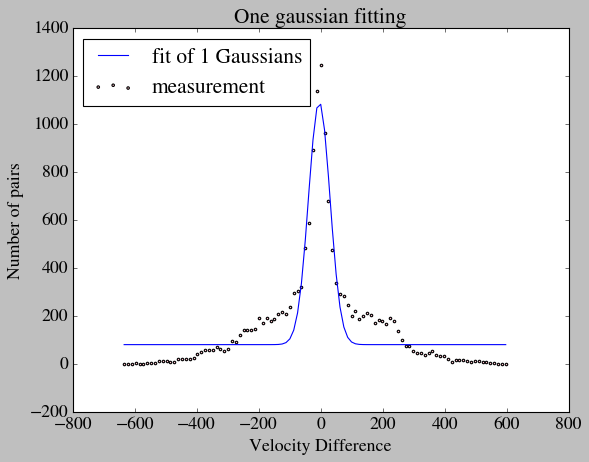

test 92404.6710957168 47337.55554647341 -74.07329807504459 65.54473267093809 -570.0250139184664 -74.07329807504459 0.9760186180822007
0.9760186180822007
4
[404.87149284  -1.28019785  17.60326034  46.16161998 -21.01046617
 207.99547728  -1.4822041 ] 1.0063331751343467


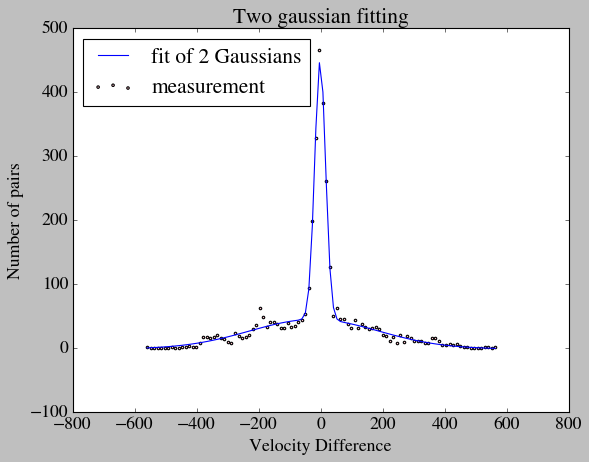

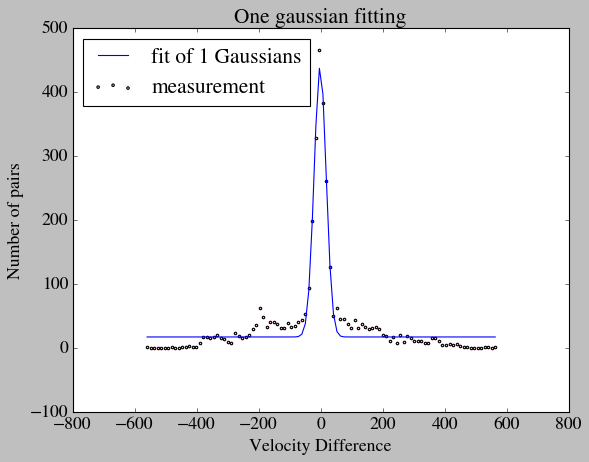

test 22462.60036924768 9628.772502992626 -54.08997887900299 51.5295831790957 -644.9968980014298 -54.08997887900299 1.1664311500903306
1.1664311500903306


In [93]:
indexoutot,indexstot,overlaptot,narrowtotal,optim= nstar_position(indexf[2],test1f[2],3,100,s6b,s6h)

In [63]:
np.savetxt('halo17_scale2_veldiff_01.txt', optim, delimiter=' ')

In [116]:
test1f[0]

[array([   1.2805139 ,  -56.65480946,  -19.59392605, ...,  302.87567914,
         181.17936065, -170.9082971 ]),
 array([ -36.83350456,   44.25648649, -256.68106312, ...,   18.76611878,
          65.82909228,    4.30611959]),
 array([ 38.96799066,  18.95245994,  44.45038232, ...,   4.05384507,
        165.75319141, -85.55709968]),
 array([ -44.27212817,   -6.52721924,  -77.13638486, ...,  -12.84988693,
          18.25051912, -157.49711763]),
 array([ 16.13402918,  20.78322121, -30.70895369, ...,   6.37634834,
         27.13583644, -42.55592451]),
 array([  11.73425119,   43.21092501,   19.66408822,  131.24937115,
          31.57967127,  -29.86128487,  -30.57311548,   -9.92765527,
          45.28381084,    4.17124595,   -3.94620952,   -9.44496813,
          15.28004242,   -5.00003227,    6.621172  ,    2.05138966,
        -193.48460492,   22.51750928,   81.27624625,  156.48850866,
          42.41839444, -119.14871545, -373.42891555,   10.48580613,
          23.78303179,  -36.20347368,  

In [90]:
from scipy.stats import poisson
mu = 30.8
mea = poisson.std(mu, loc=0)
print (mea)

5.549774770204643


In [113]:
indexoutot,indexstot,overlaptot,narrowtotal= nstar_position(indexf[0],test1f[0],3)

0
2 290.53181954504913
1 14794.610754690662


AttributeError: 'NoneType' object has no attribute 'sqrt'

In [51]:
#plotting narrow peak star satellite properties
def sate_narrow_plot(rlim,inputid,df3,totalstarid,totaldata,satlow,sathigh,radius,interval):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            staridf = df3['starid'][np.isin(df3['index'],np.ravel(inputid[k]))]
            

            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),np.unique(satidunqiue))
            
            print (satidunqiue)
            #print (staridf,satidunqiue)
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh][satidcut],data2['tsat'][satlow:sathigh][satidcut],marker='o', c='b',s=data2['msat'][satlow:sathigh][satidcut]/10E8, label=str(int(radius[k])) +'-'+ str(int(radius[k]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            

            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrected Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            staridf = df3['starid'][np.isin(df3['index'],df3['index'][(rlim[k] < df3['r']) & (df3['r']<rlim[k]+interval )])]

            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),np.unique(satidunqiue))
            
            #print (staridf,satidunqiue)
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh][satidcut],data2['tsat'][satlow:sathigh][satidcut],marker='o', c='b',s=data2['msat'][satlow:sathigh][satidcut]/10E8, label=str(int(radius[k])) +'-'+ str(int(radius[k]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            

            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrection Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            k = k + 1
    plt.show()
    
        
        
             
        
        
        
            
            
        
        
        
        
        
    
    
        
   
        
        

In [227]:
#plotting narrow peak star satellite properties
def sate_narrow_plot_2(rlim,inputid,df3,totalstarid,totaldata,satlow,sathigh,radius,interval):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            satmass = [] 
            satmass2 = []
            staridf = df3['starid'][np.isin(df3['index'],np.ravel(inputid[k]))]
            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]
            sattot = np.arange(satlow,sathigh)
            
            staridf2 = df3['starid'][np.isin(df3['index'],df3['index'][(rlim[k] < df3['r']) & (df3['r']<rlim[k]+interval )])]

            satidunqiue2 = testd['satid'][np.isin(totalstarid,staridf2)]

            satidcut2 = np.isin(np.arange(satlow,sathigh),np.unique(satidunqiue2))
            print (len(data2['msat'][satlow:sathigh][satidcut2]))
            for kk in range(0,len(sattot)):
                satmass.append(data2['msat'][satlow:sathigh][kk]*len(satidunqiue[satidunqiue==sattot[kk]]))
                satmass2.append(data2['msat'][satlow:sathigh][kk]*len(satidunqiue2[satidunqiue2==sattot[kk]]))
                           
                                           

                     #satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),satidunqiue)
            #print (len(np.ravel(np.nonzero(satmass))))
            
            #print (np.ravel(satmass)/10**12-np.ravel(satmass2)/10**12)
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh],data2['tsat'][satlow:sathigh],marker='o', c='b',s=(np.absolute(np.ravel(satmass)-np.ravel(satmass2)))/10**11, label=str(int(radius[k])) +'-'+ str(int(radius[k]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            

            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrected Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            k = k + 1
    #plt.show()
    fig, ax = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=True)

    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    j=0
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            satmass = [] 
            satmass2 = []
            staridf = df3['starid'][np.isin(df3['index'],np.ravel(inputid[j]))]
            satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]
            sattot = np.arange(satlow,sathigh)
            
            staridf2 = df3['starid'][np.isin(df3['index'],df3['index'][(rlim[j] < df3['r']) & (df3['r']<rlim[j]+interval )])]

            satidunqiue2 = list(set(testd['satid'][np.isin(totalstarid,staridf2)])-set(testd['satid'][np.isin(totalstarid,staridf)]))
            satidunqiue3 = testd['satid'][np.isin(totalstarid,staridf2)][np.isin(testd['satid'][np.isin(totalstarid,staridf2)],satidunqiue2)]
            #satidcut2 = testd['satid'][np.isin(totalstarid,staridf2)][np.isin(testd['satid'][np.isin(totalstarid,staridf2)],np.unique(satidunqiue2))]
            #print (len(satidunqiue),len(satidunqiue3))
            for kk in range(0,len(sattot)):
                satmass.append(data2['msat'][satlow:sathigh][kk]*len(satidunqiue[satidunqiue==sattot[kk]]))
                satmass2.append(data2['msat'][satlow:sathigh][kk]*len(np.array(satidunqiue3)[satidunqiue3==sattot[kk]]))
                           
                                           

                     #satidunqiue = testd['satid'][np.isin(totalstarid,staridf)]

            satidcut = np.isin(np.arange(satlow,sathigh),satidunqiue)
            #print (np.ravel(satmass2)-np.ravel(satmass))
            
        
            #ax[index][jndex].scatter(data2['tsat'][satlow:sathigh], np.ravel(satmass)/np.ravel(satmass2)*100000, label=str(int(radius[j])) +'-'+ str(int(radius[j]+8))+'kpc')
            #ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            #ax[index][jndex].scatter(df4['x'],df4['y'],df4['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')
            
            ax[index][jndex].scatter(data2['jsat'][satlow:sathigh],data2['tsat'][satlow:sathigh],marker='o', c='b',s=(np.absolute(np.ravel(satmass)-np.ravel(satmass2)))/10**11, label=str(int(radius[j])) +'-'+ str(int(radius[j]+8))+'kpc')
            ax[index][jndex].set_xlabel('Circularity')
            ax[index][jndex].set_ylabel('Accrected Time (Gyr)')
            ax[index][jndex].legend( prop={'size': 16})
        
            
            
            j = j + 1
    plt.show()
#plt.savefig('halo17_space_2_unbound.png')             
 

67
56
47
42
39
35


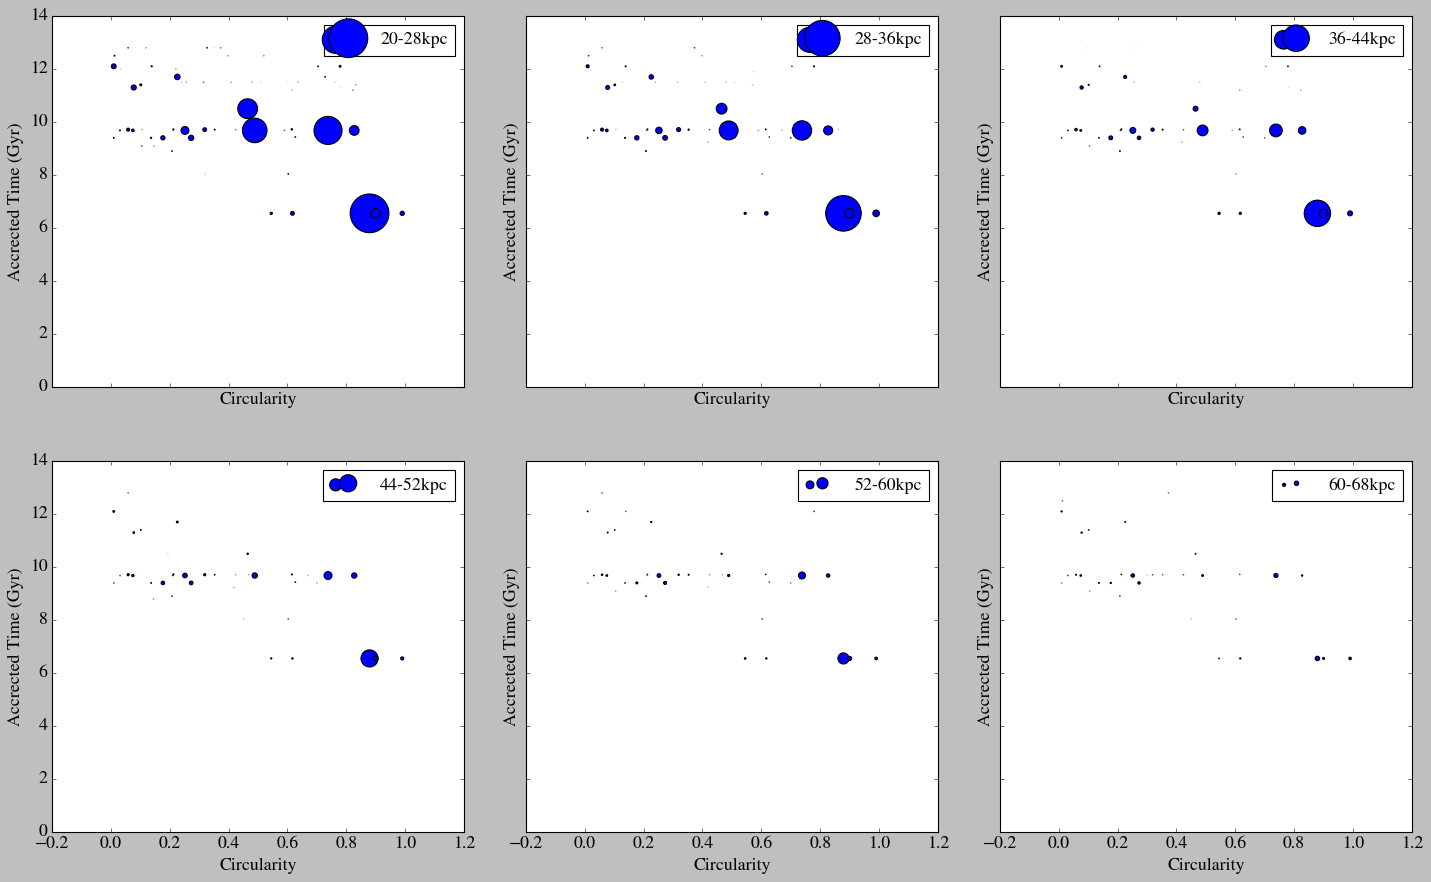

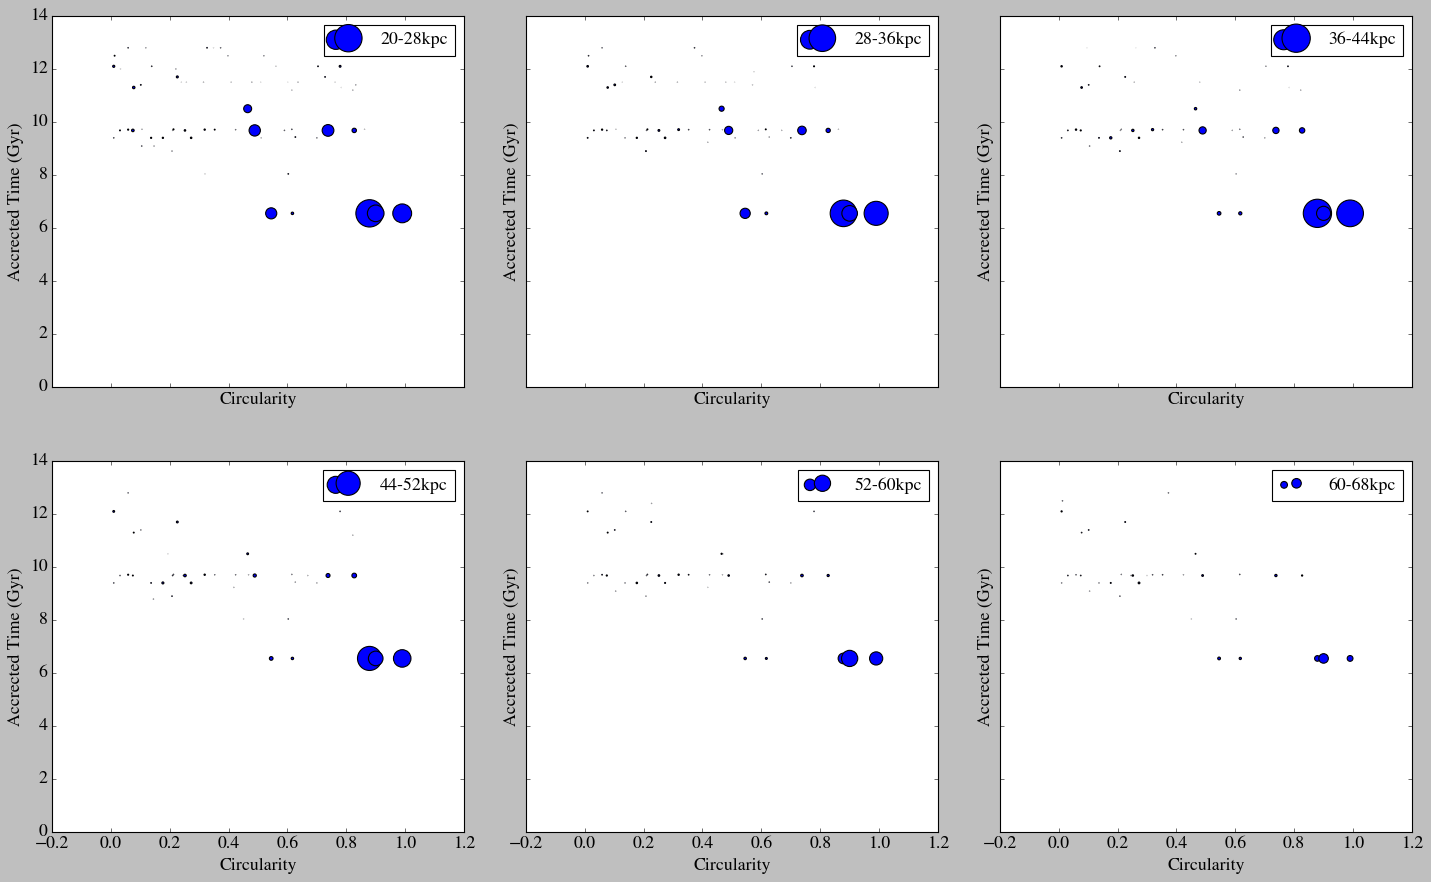

In [228]:
sate_narrow_plot_2(rlim,finalid,df3,groupidi,testd,1211,(1515-149),rlimf[2],8)

11       1254
14       1225
20       1239
31       1254
49       1223
56       1253
59       1257
63       1223
69       1253
94       1228
108      1248
111      1225
113      1224
120      1257
122      1223
139      1228
148      1254
152      1239
164      1253
184      1248
190      1223
197      1267
200      1267
205      1228
235      1228
238      1224
242      1223
244      1267
252      1224
254      1267
         ... 
59766    1223
59772    1253
59775    1253
59778    1225
59791    1274
59793    1223
59810    1247
59814    1253
59821    1254
59823    1225
59831    1253
59841    1223
59855    1223
59856    1223
59866    1223
59872    1228
59885    1267
59918    1223
59921    1224
59933    1248
59934    1223
59941    1269
59942    1248
59946    1254
59947    1225
59953    1299
59965    1228
59970    1239
59982    1249
59989    1223
Name: satid, Length: 7404, dtype: int32
0        1249
5        1223
6        1224
10       1225
19       1249
23       1225
45       1224
48      

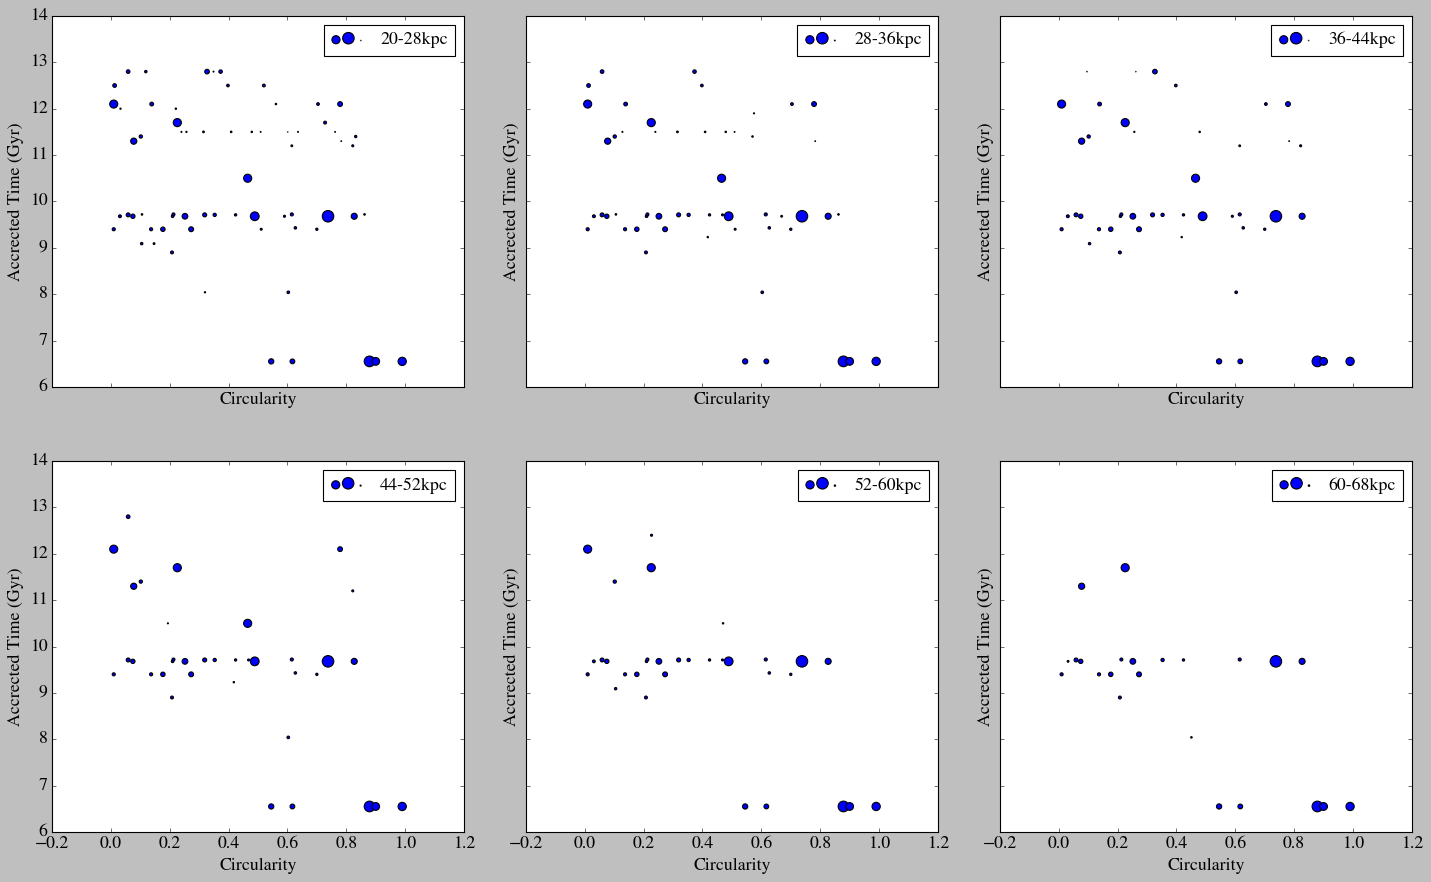

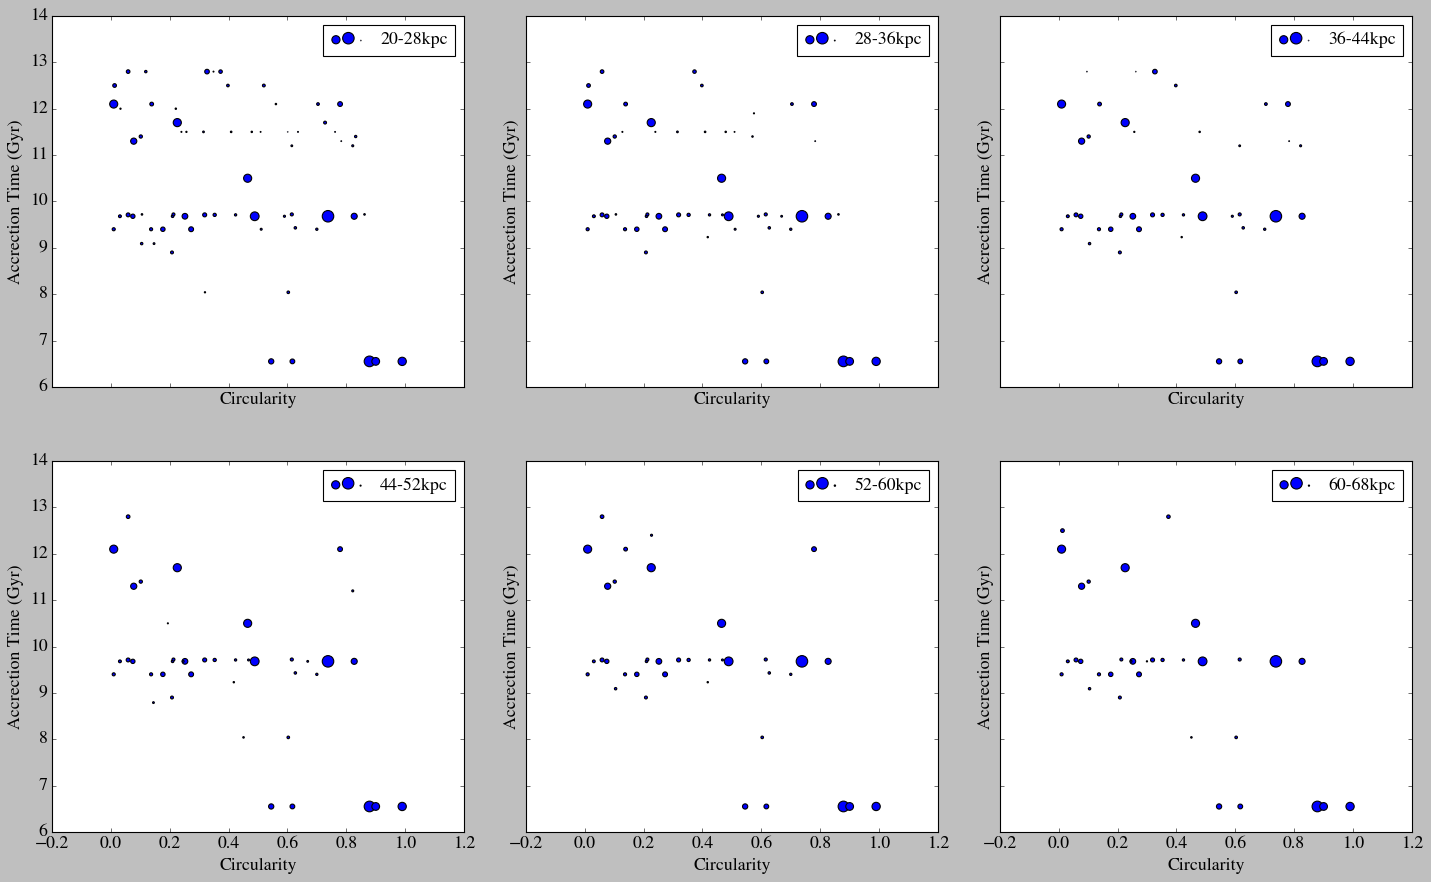

In [150]:
sate_narrow_plot(rlim,indexstot,df3,groupidi,testd,1211,(1515-149),rlimf[2],8)

In [544]:
#plotting narrow peak star position properties
def threed_narrow_plot(inputid,df3):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    subplot_args = {'projection':'3d'}
    fig, ax = plt.subplots(3, 2, figsize=(20, 18), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False,subplot_kw=subplot_args)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            dff = df3[df3['index'].isin(np.unique(inputid[k]))]
            ax[index][jndex].scatter(df3['x'],df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            ax[index][jndex].scatter(dff['x'],dff['y'],dff['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample ')

            
            ax[index][jndex].set_xlabel('X Label')
            ax[index][jndex].set_ylabel('Y Label')
            ax[index][jndex].set_zlabel('Z Label')
            ax[index][jndex].set_ylim(-75,75)
            ax[index][jndex].set_xlim(-75,75)
            ax[index][jndex].set_zlim(-75,75)
            ax[index][jndex].legend(prop={'size': 16})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    

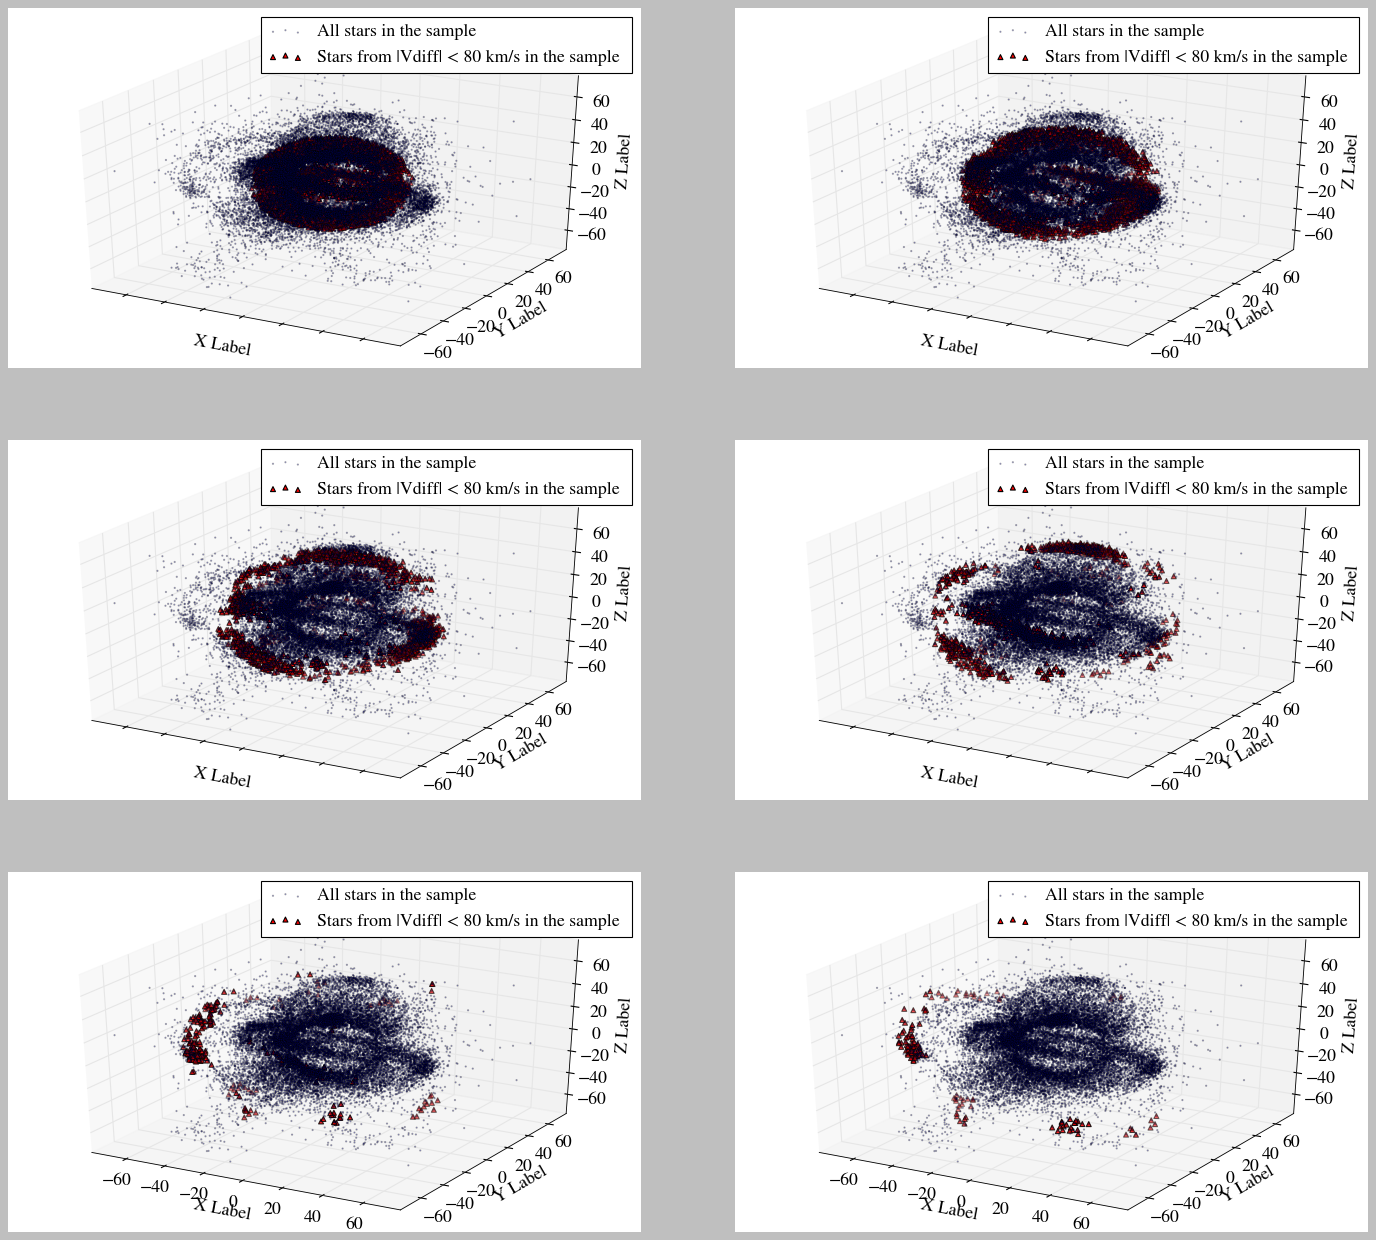

In [480]:
threed_narrow_plot(indexstot,df3)

In [593]:
#plotting narrow peak star position properties
def twod_narrow_plot(inputid,df3,radius):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    
    fig, ax = plt.subplots(3, 2, figsize=(20, 18), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True, sharey=False)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            dff = df3[df3['index'].isin(np.unique(inputid[k]))]
            ax[index][jndex].scatter(df3['y'],df3['z'],c='b',marker='o',s=1,alpha= 0.3,label = 'All stars in the sample')
            ax[index][jndex].scatter(dff['y'],dff['z'],c='red',marker='^',label = 'Stars from |Vdiff| < 80 km/s in the sample '+str(int(radius[k])) +'-'+ str(int(radius[k]+8))+' kpc')

            
            ax[index][jndex].set_xlabel('Y (Kpc)')
            ax[index][jndex].set_ylabel('Z (Kpc)')
            #ax[index][jndex].set_zlabel('Z Label')
            ax[index][jndex].set_ylim(-75,75)
            ax[index][jndex].set_xlim(-75,75)
            #ax[index][jndex].set_zlim(-75,75)
            ax[index][jndex].legend(loc=4,prop={'size': 13})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    

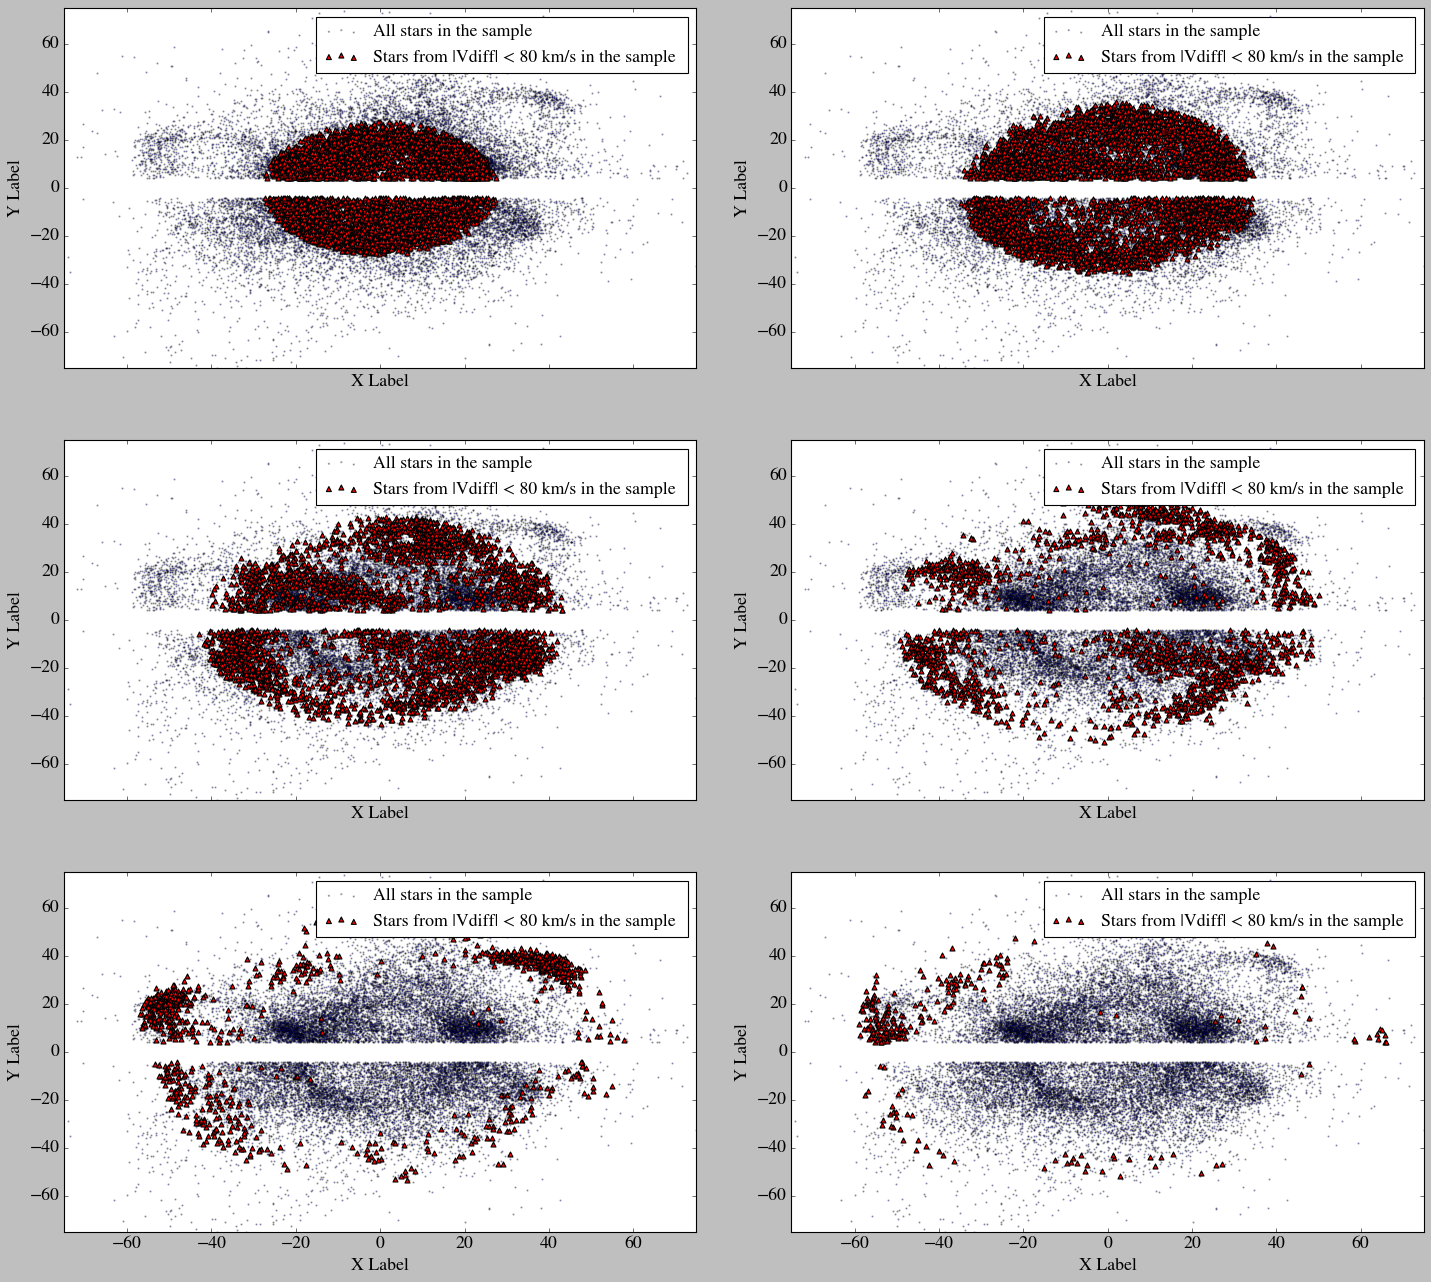

In [482]:
twod_narrow_plot(indexstot,df3)

In [535]:
#plotting narrow peak star histogram properties
def threed_narrow_hist(inputidal,inputidol,inputidna):
    data2=ebf.read('/Users/Jenny/thesis_idea_test/halo/galaxia/bj/'+'satprop.ebf') #reads in ebf file for galaxia output
    df=pd.DataFrame() #creates empty pandas DataFrame
    #subplot_args = {'projection':'3d'}
    fig, ax = plt.subplots(3, 2, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            
            ax[index][jndex].hist(np.ravel((inputidal[k])),bins=60,color='r',label = 'All ID found inside narrow peak')
            ax[index][jndex].hist(np.ravel(inputidal[k])[np.isin(np.ravel(inputidal[k]),inputidol[k])],bins=60,alpha=0.5,color='g',label = 'ID found outside narrow peak')
            ax[index][jndex].hist(np.ravel(inputidna[k]),bins=60,label = 'ID found only inside narrow peak',color = 'blue', alpha = 0.3)
            
            ax[index][jndex].set_xlabel('Star-ID')
            ax[index][jndex].set_ylabel('Number')
            

           
    
            ax[index][jndex].legend(prop={'size': 16})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    

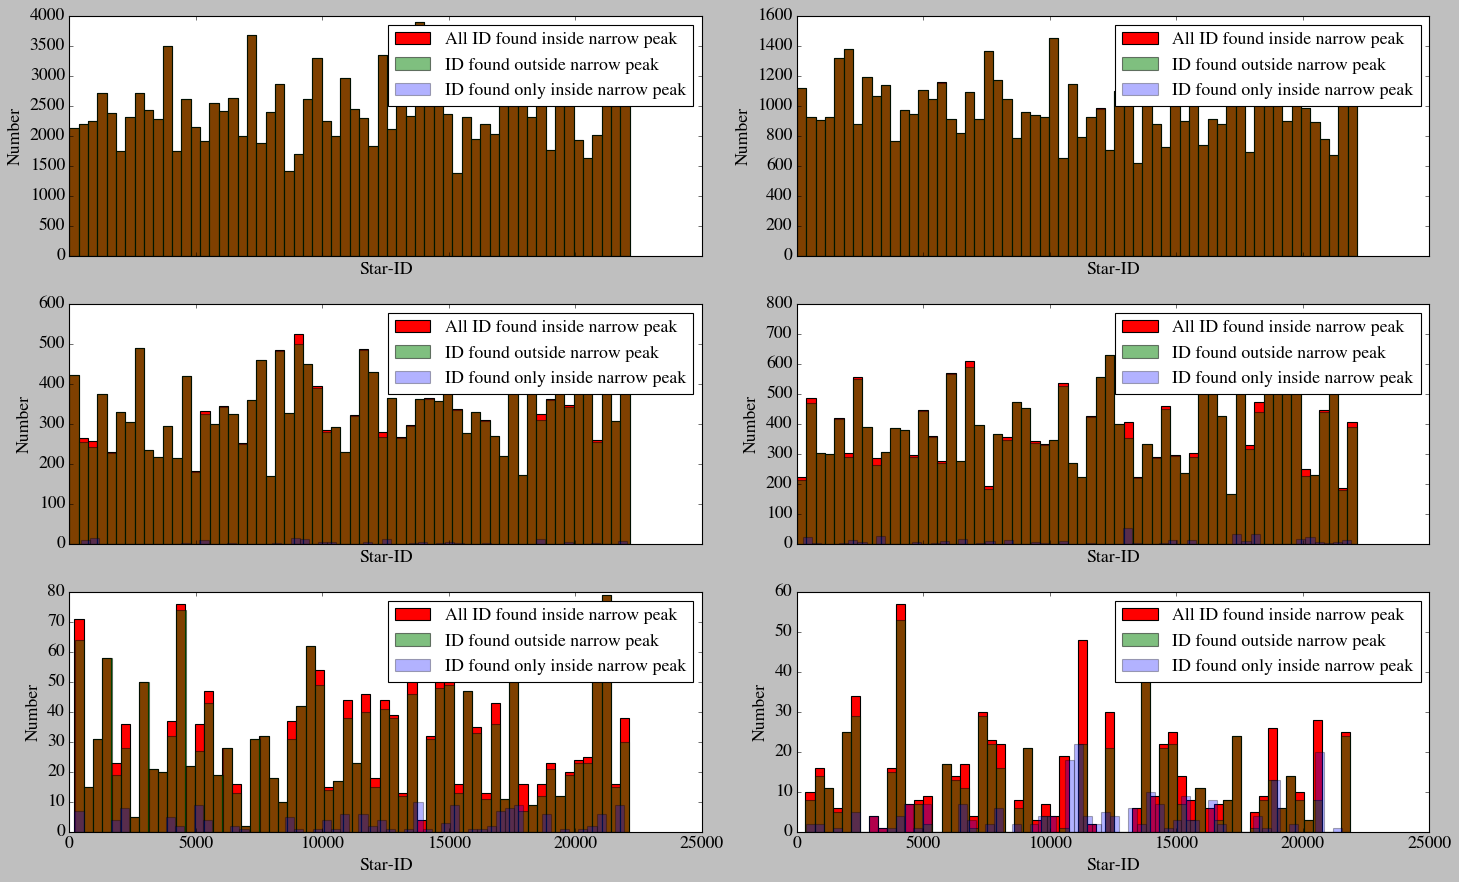

In [484]:
threed_narrow_hist(indexstot,overlaptot,narrowtotal)

In [514]:
a= [1,1,1,1,2,2,2,2,3,3,4,5,5]
from itertools import groupby
[len(list([])) for key, group in groupby(a)]

[1, 1, 1, 1, 1]

In [511]:
len(np.sort(indexoutot[0]))

761454

In [47]:
#plotting narrow peak star histogram properties
def threed_narrow_hist(inputidal,indexoutot):
    
    
    
    
    #idtotal = df3['index'][(rlim[k] < df3['r']) & (df3['r']<rlim[k]+interval )]
    #subplot_args = {'projection':'3d'}
    fig, ax = plt.subplots(3, 2, figsize=(20, 12), gridspec_kw={'wspace': 0.15, 'hspace': 0.2}, sharex=True)
    #ax = fig.add_subplot(111,projection='3d')
    fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.9)
    k = 0
    finalid = []
    degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
    for index in range(ax.shape[0]):
        for jndex in range(ax.shape[1]):
            
            outfre = []
            unique_id, counts_elements = np.unique(inputidal[k], return_counts=True)
            
            for item in unique_id:
                nn = 0
                for item2 in indexoutot[k]:
                    if item == item2:
                        nn=nn+1
                outfre.append(nn)
            
            
            finalid.append(unique_id[(counts_elements-outfre) > 0])
            
    
    
            #outfre = [len(list(unique_id)) for key, group in groupby(indexoutot[k])]
            print (len(unique_id), len(counts_elements),len(indexoutot[k]))
            
            ax[index][jndex].plot(unique_id,counts_elements-outfre,c='r',label = 'Difference between two frequency')
            #ax[index][jndex].plot(unique_id,outfre)
            
            ax[index][jndex].set_xlabel('Star-ID')
            ax[index][jndex].set_ylabel('Count Number')
            

           
    
            ax[index][jndex].legend(prop={'size': 16})

        
            
            
            k = k + 1
#plt.savefig('halo17_space_2_unbound.png')             
    plt.show()
    
    return finalid 
    

7404 7404 528672
5821 5821 172028
4102 4102 58948
2161 2161 12846
1063 1063 4508
339 339 296


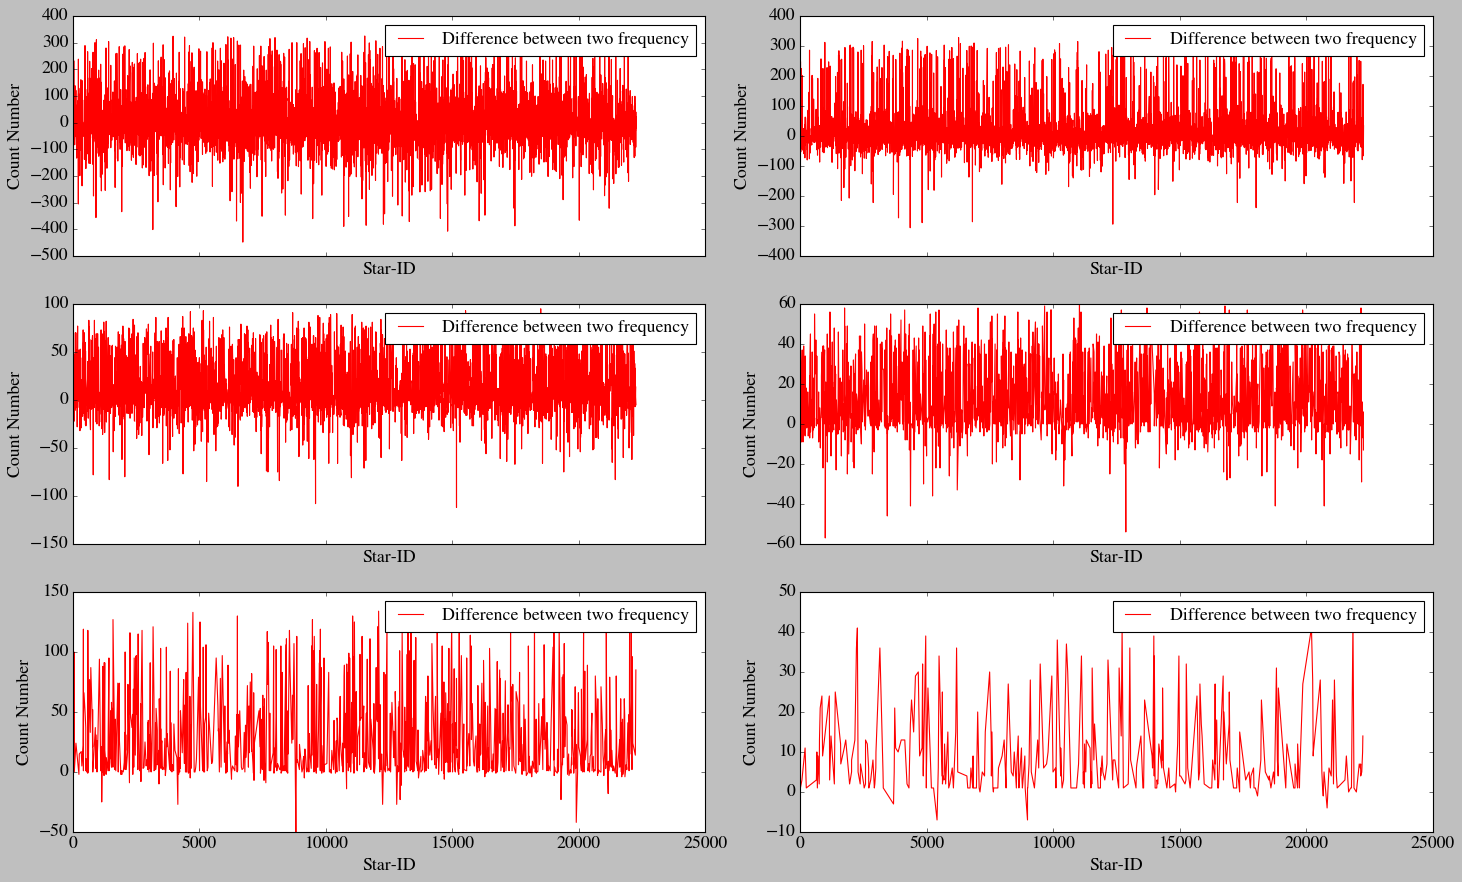

In [48]:
 finalid  = threed_narrow_hist(indexstot,indexoutot)

In [537]:
len(finalid[0])

730

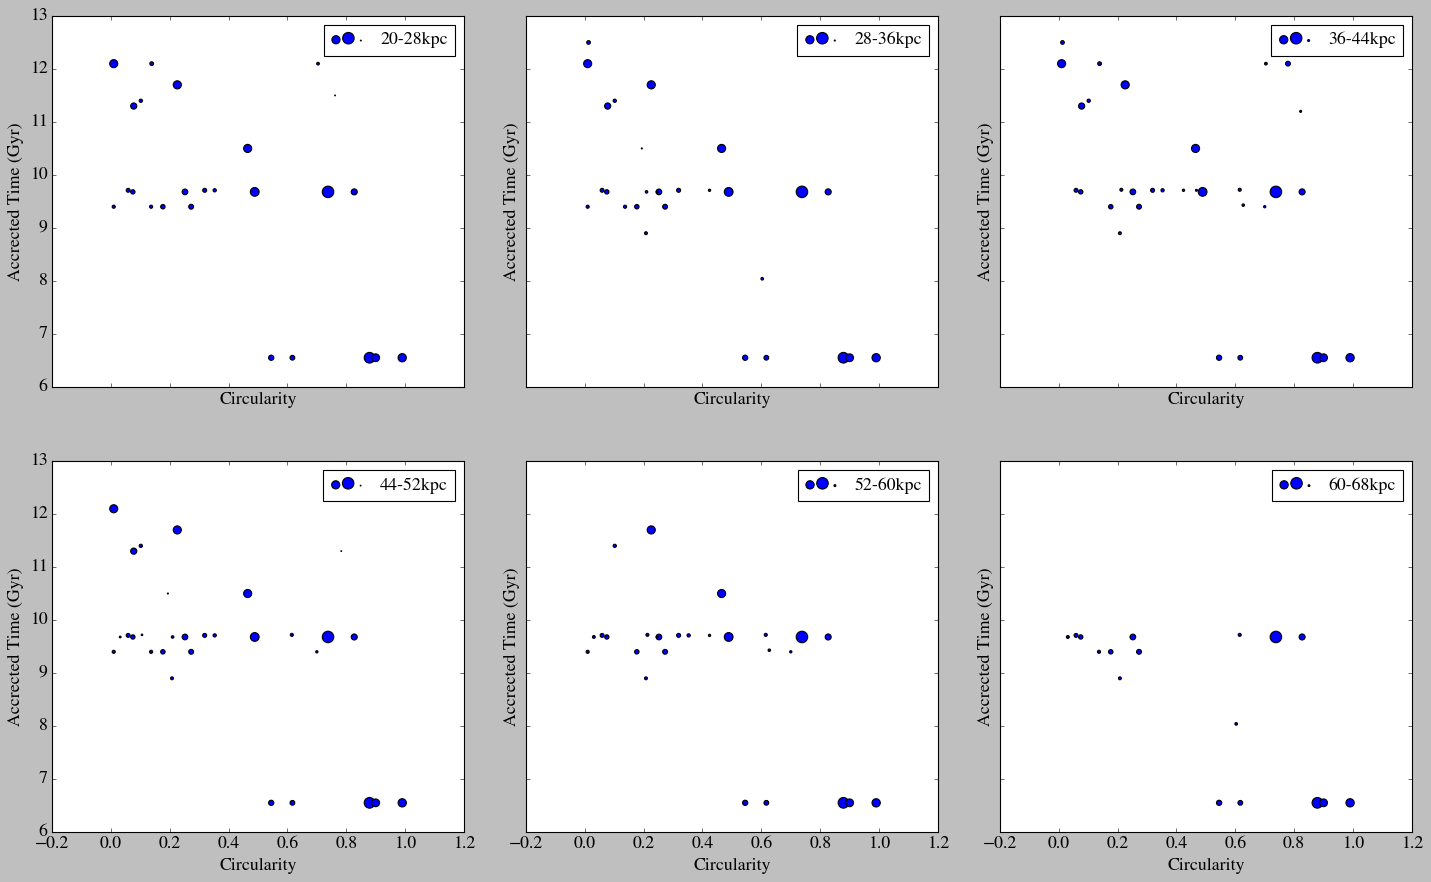

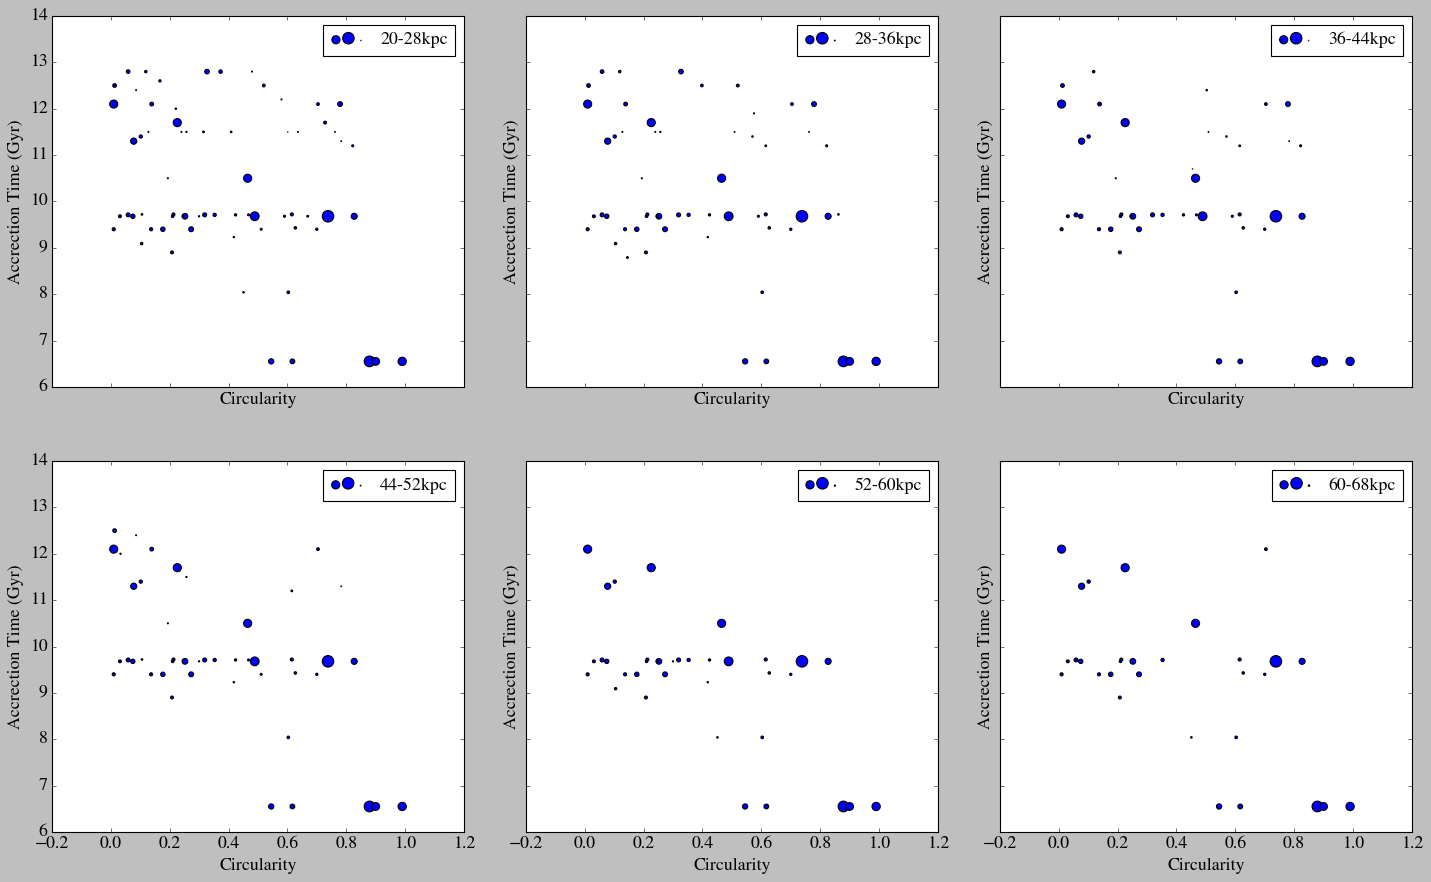

In [615]:
sate_narrow_plot(rlim,finalid,df3,groupidi,testd,1211,(1515-149),rlimf[2],8)

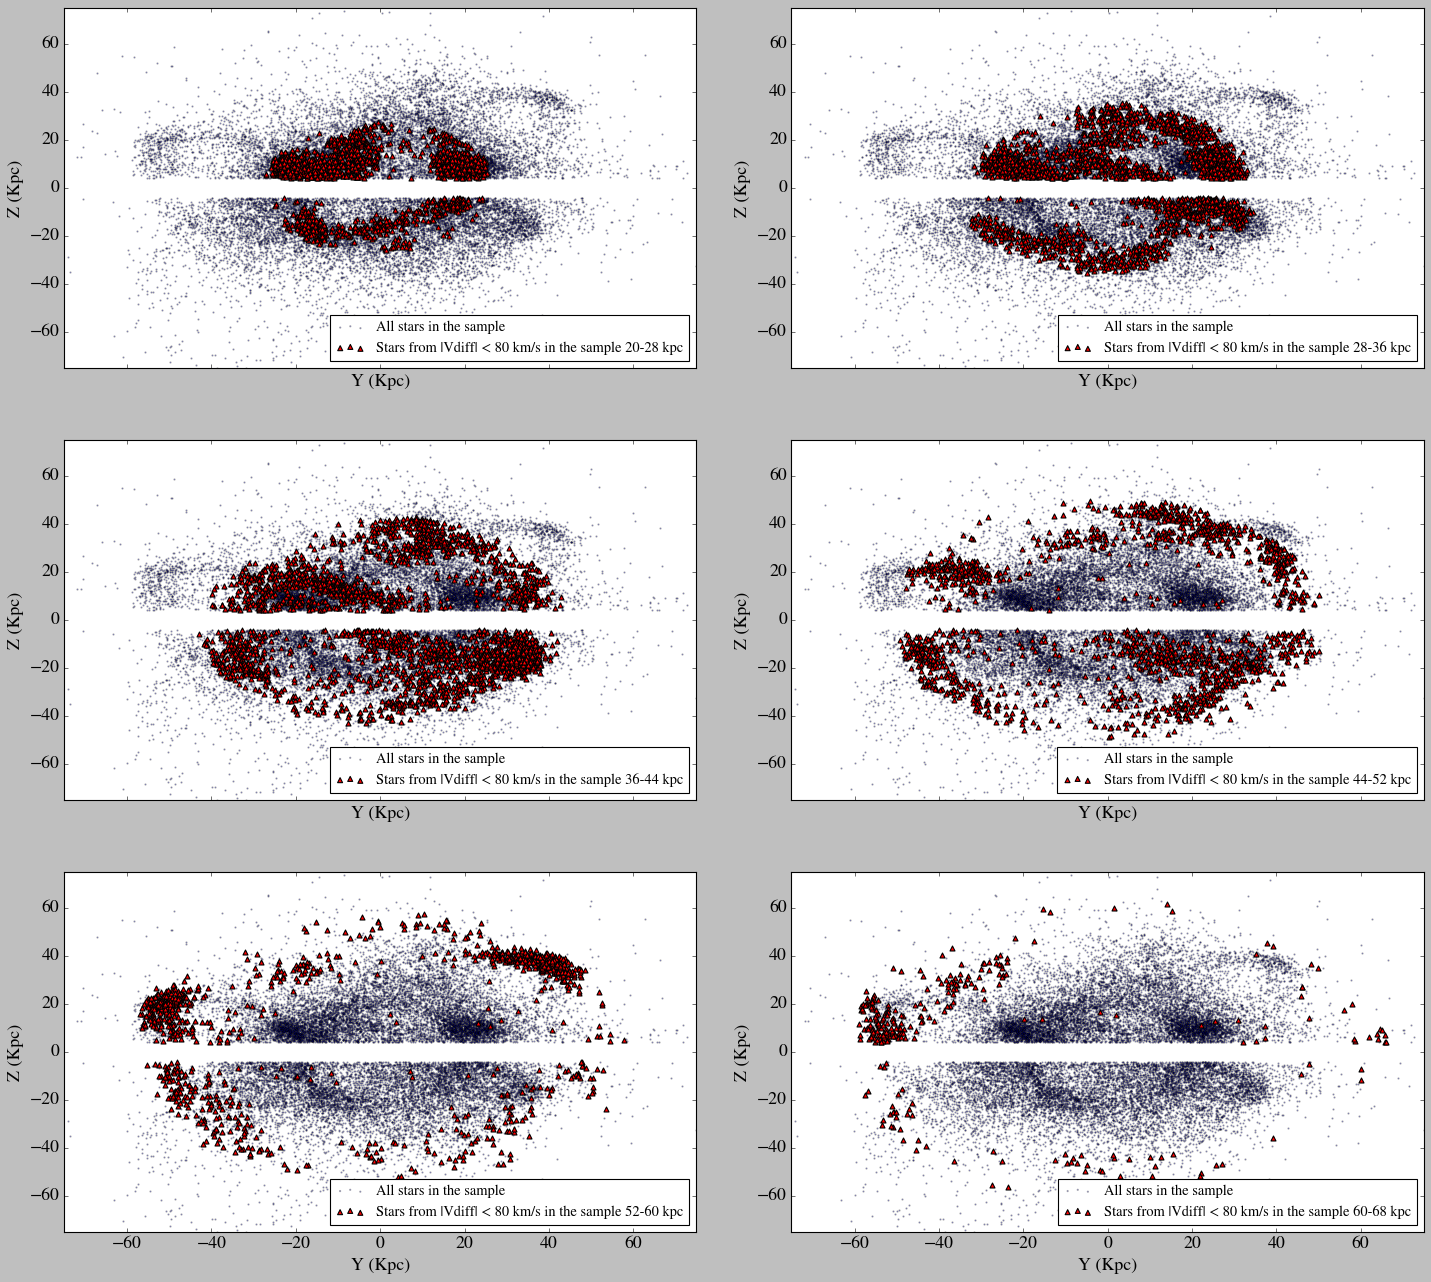

In [594]:
twod_narrow_plot(finalid,df3,rlim)

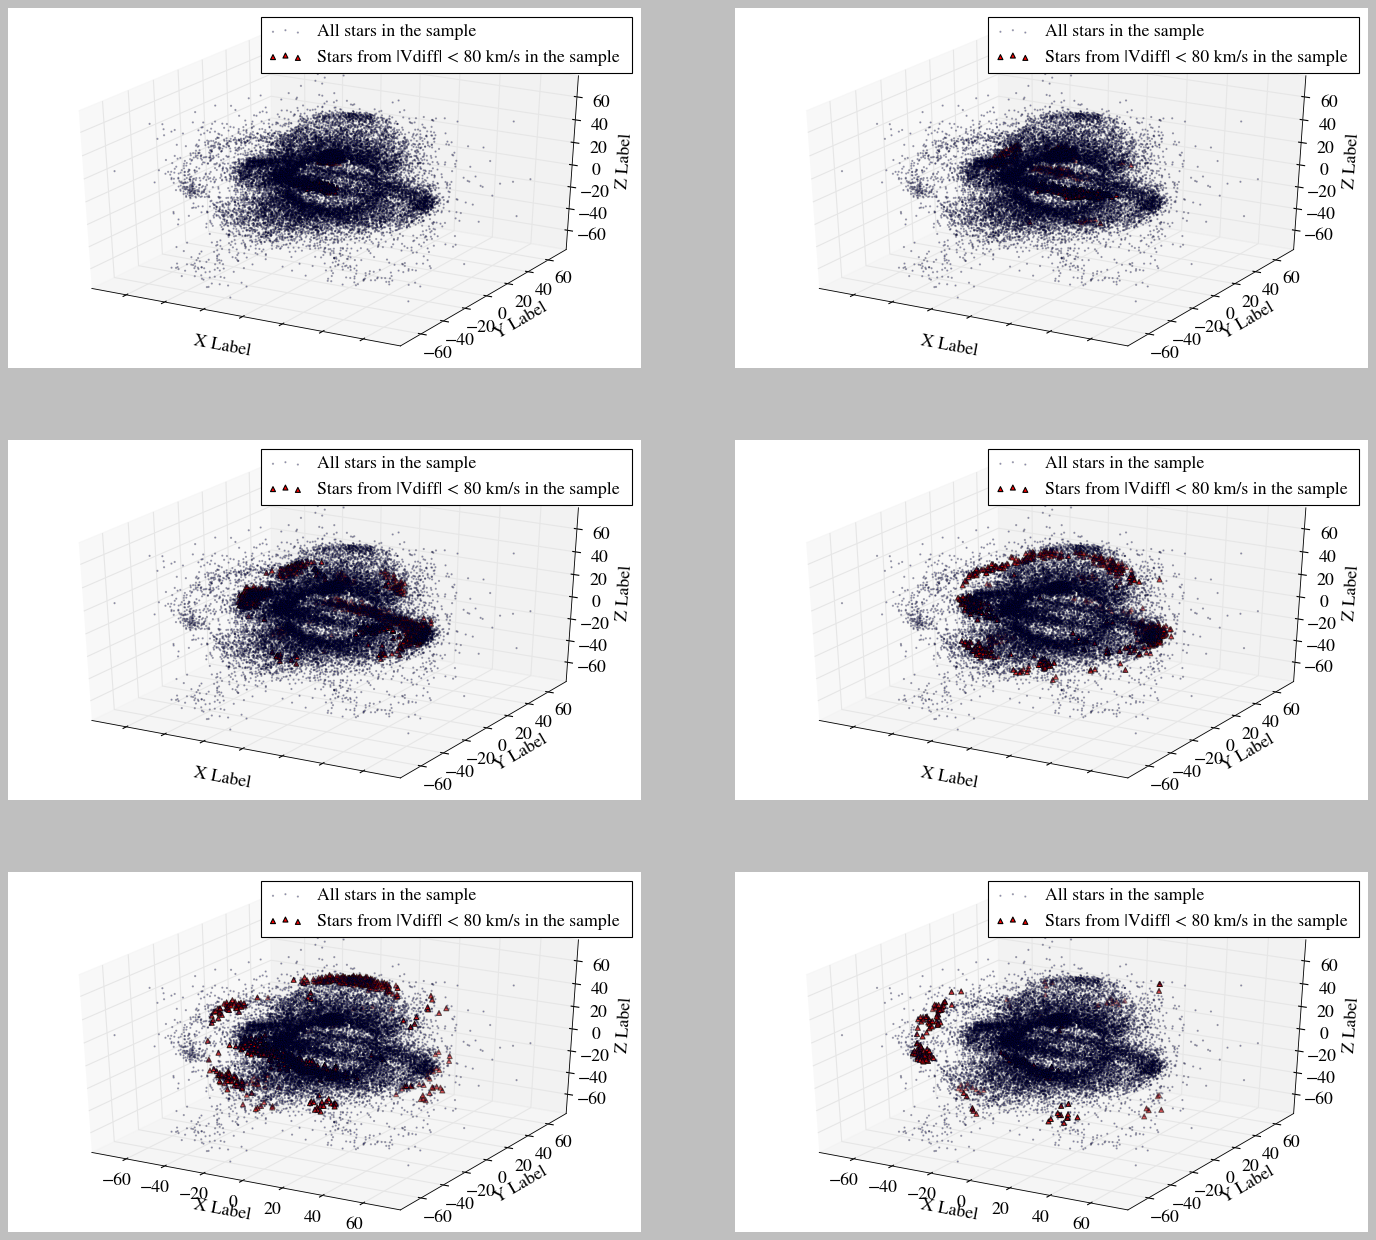

In [548]:
threed_narrow_plot(finalid,df3)

In [581]:
uniindex = list(set(df3['index'][ (60 < df3['r'] ) & (df3['r'] < 68 )])-set(finalid[5]))

In [582]:
len(uniindex)

205

# Stellar Mass of Satellites

In [28]:
len(data2['msat'])

1515

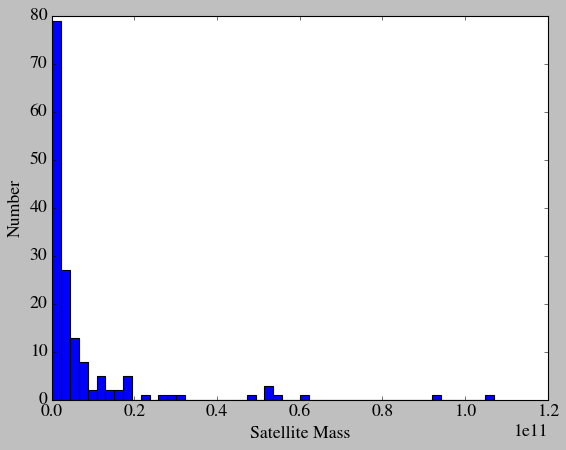

In [80]:
plt.hist(data2['msat'][1211:(1515-149)],bins=50)
plt.xlabel('Satellite Mass')
plt.ylabel('Number')
plt.show()

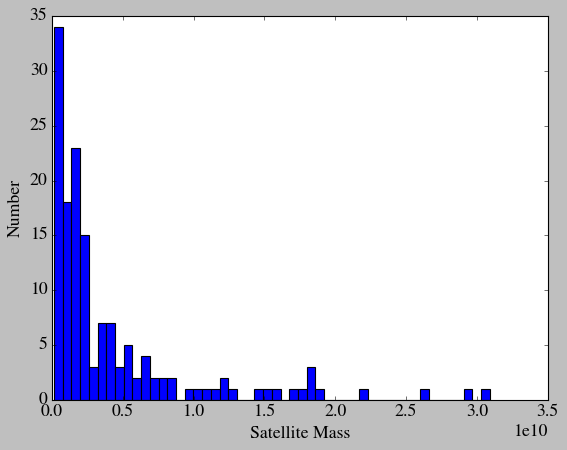

In [31]:
plt.hist(data2['msat'][1211:(1515-149)][data2['msat'][1211:(1515-149)] < 0.4e11],bins=50)
plt.xlabel('Satellite Mass')
plt.ylabel('Number')
plt.show()

In [18]:
one = [1,2,3,4]
two = [1,2]

In [20]:
vdiff = []
for jj in range(0, len(two)):

            # print (k.rv,k2.rv)


    vi = np.repeat(two[jj], len(one))
    vdiff.append(vi - one)
print (vdiff)
indexfo = np.array(vdiff)[np.triu_indices(len(two), 1)]
print (indexfo)
         

[array([ 0, -1, -2, -3, -4]), array([ 1,  0, -1, -2, -3]), array([ 2,  1,  0, -1, -2])]
[-1 -2 -1]


In [ ]:
11 12 13 14 15
21 22 23 24 25 
31 32 33 34 35

13 14 15
23 24 25
33 34 35